# Machine Learning - 1st Project Phase (Evaluation Phase)

### 2) Avocado Project 

-- Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

-- Features

Some relevant columns in the dataset:

1)	Date - The date of the observation

2)	AveragePrice - the average price of a single avocado

3)	type - conventional or organic

4)	year - the year

5)	Region - the city or region of the observation

6)	Total Volume - Total number of avocados sold

7)	4046 - Total number of avocados with PLU 4046 sold

8)	4225 - Total number of avocados with PLU 4225 sold

9)	4770 - Total number of avocados with PLU 4770 sold


-- Output Variable

The dataset can be seen in two angles to find the region and find the average price.

Task: One of Classification and other of Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
avocado_1 = pd.read_csv("C:/Users/user/Documents/avocado.csv")
avocado_1

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1      20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2      13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3      06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4      29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  04-02-2018          1.63      17074.83  2046.96    1529.20    0.00   
18245  28-01-2018          1.71      13888.04  1191.70    3431.50    0.00   
18246  21-01-2018          1.87      13766.76  1191.92    2452.79  727.94   
18247  14-01-2018          1.93      16205.22  1527.63    2981.04  727.01   
18248  07-01-2018          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

-- As this dataset can be seen in two angles (i.e both classification and Regression)..
Firstly, we shall be analysing the regression part of the problem then with the classification part.

1) Regression - output variable (Average Price)

In [5]:
avocado_1.shape

(18249, 13)

In [6]:
avocado_1.head(10)

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1  20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2  13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3  06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4  29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
5  22-11-2015          1.26      55979.78  1184.27   48067.99   43.61   
6  15-11-2015          0.99      83453.76  1368.92   73672.72   93.26   
7  08-11-2015          0.98     109428.33   703.75  101815.36   80.00   
8  01-11-2015          1.02      99811.42  1022.15   87315.57   85.34   
9  25-10-2015          1.07      74338.76   842.40   64757.44  113.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany  
5     6683.91     6556.47      127.44          0.0  conventional  2015  Albany  
6     8318.86     8196.81      122.05          0.0  conventional  2015  Albany  
7     6829.22     6266.85      562.37          0.0  conventional  2015  Albany  
8    11388.36    11104.53      283.83          0.0  conventional  2015  Albany  
9     8625.92     8061.47      564.45          0.0  conventional  2015  Albany

In [5]:
avocado_1.tail(10)

Date  AveragePrice  Total Volume     4046     4225    4770  \
18239  11-03-2018          1.56      22128.42  2162.67  3194.25    8.93   
18240  04-03-2018          1.54      17393.30  1832.24  1905.57    0.00   
18241  25-02-2018          1.57      18421.24  1974.26  2482.65    0.00   
18242  18-02-2018          1.56      17597.12  1892.05  1928.36    0.00   
18243  11-02-2018          1.57      15986.17  1924.28  1368.32    0.00   
18244  04-02-2018          1.63      17074.83  2046.96  1529.20    0.00   
18245  28-01-2018          1.71      13888.04  1191.70  3431.50    0.00   
18246  21-01-2018          1.87      13766.76  1191.92  2452.79  727.94   
18247  14-01-2018          1.93      16205.22  1527.63  2981.04  727.01   
18248  07-01-2018          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18239    16762.57    16510.32      252.25          0.0  organic  2018   
18240    13655.49    13401.93      253.56          0.0  organic  2018   
18241    13964.33    13698.27      266.06          0.0  organic  2018   
18242    13776.71    13553.53      223.18          0.0  organic  2018   
18243    12693.57    12437.35      256.22          0.0  organic  2018   
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18239  WestTexNewMexico  
18240  WestTexNewMexico  
18241  WestTexNewMexico  
18242  WestTexNewMexico  
18243  WestTexNewMexico  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [6]:
#Checking for null values
avocado_1.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values in the given dataset..

In [7]:
#Checking for Duplicates
avocado_1.duplicated().sum()

0

No duplicate values also in the given dataset..

In [8]:
#Checking for dataset info
avocado_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [9]:
#Checking the number of unique values of each column
avocado_1.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [3]:
#Now instead of dropping the date column..I will be splitting the date into only date and months..as I think it will be helpful for our analysis.
#Day
avocado_1['Day'] = avocado_1['Date'].str.split('-',expand = True)[0]

In [4]:
#Month
avocado_1['Month'] = avocado_1['Date'].str.split('-',expand = True)[1]

In [5]:
avocado_1

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      27-12-2015          1.33      64236.62  1036.74   54454.85   48.16   
1      20-12-2015          1.35      54876.98   674.28   44638.81   58.33   
2      13-12-2015          0.93     118220.22   794.70  109149.67  130.50   
3      06-12-2015          1.08      78992.15  1132.00   71976.41   72.58   
4      29-11-2015          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  04-02-2018          1.63      17074.83  2046.96    1529.20    0.00   
18245  28-01-2018          1.71      13888.04  1191.70    3431.50    0.00   
18246  21-01-2018          1.87      13766.76  1191.92    2452.79  727.94   
18247  14-01-2018          1.93      16205.22  1527.63    2981.04  727.01   
18248  07-01-2018          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region Day Month  
0                Albany  27    12  
1                Albany  20    12  
2                Albany  13    12  
3                Albany  06    12  
4                Albany  29    11  
...                 ...  ..   ...  
18244  WestTexNewMexico  04    02  
18245  WestTexNewMexico  28    01  
18246  WestTexNewMexico  21    01  
18247  WestTexNewMexico  14    01  
18248  WestTexNewMexico  07    01  

[18249 rows x 15 columns]

-- We have splitted the Date column into Days and Months..Now we can drop the 'Date' column..

In [6]:
#Removing the 'Date' feature 
avocado_1.drop(['Date'],axis=1,inplace=True)

In [7]:
avocado_1

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region Day Month  
0                Albany  27    12  
1                Albany  20    12  
2                Albany  13    12  
3                Albany  06    12  
4                Albany  29    11  
...                 ...  ..   ...  
18244  WestTexNewMexico  04    02  
18245  WestTexNewMexico  28    01  
18246  WestTexNewMexico  21    01  
18247  WestTexNewMexico  14    01  
18248  WestTexNewMexico  07    01  

[18249 rows x 14 columns]

In [15]:
#Again Checking for dataset info
avocado_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Day           18249 non-null  object 
 13  Month         18249 non-null  object 
dtypes: float64(9), int64(1), object(4)
memory usage: 1.9+ MB


In [8]:
#Converting the dtype of 'Day' and 'Month' feature from object to int
avocado_1['Day'] = avocado_1['Day'].astype(int)
avocado_1['Month'] = avocado_1['Month'].astype(int)

In [9]:
#Again Checking for dataset info
avocado_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Day           18249 non-null  int32  
 13  Month         18249 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(2)
memory usage: 1.8+ MB


In [10]:
cat_col = []
for i in avocado_1.dtypes.index:
    if avocado_1.dtypes[i] == "object":
        cat_col.append(i)
print("Categorical Variables: ",cat_col)

Categorical Variables:  ['type', 'region']


In [11]:
num_col = []
for i in avocado_1.dtypes.index:
    if avocado_1.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Variables: ",num_col)

Numerical Variables:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Day', 'Month']


In [12]:
#Checking unique variables in categorical columns
for i in cat_col:
    print(f"Categories in {i} variable: ",end=" ")
    print(avocado_1[i].unique())

Categories in type variable:  ['conventional' 'organic']
Categories in region variable:  ['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


### Univariate Analysis 

In [13]:
#Checking statistical info for numerical columns
avocado_1.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

                Day         Month  
count  18249.000000  18249.000000  
mean      15.662612      6.177215  
std        8.776281      3.534130  
min        1.000000      1.000000  
25%        8.000000      3.000000  
50%       16.000000      6.000000  
75%       23.000000      9.000000  
max       31.000000     12.000000

-- Take-aways:

1) The Mean of the Average Price of Avocado's sold is aroung 1.4 US dollars.
2) The Average Volume of Avocado's sold is at 8.6..
3) The feature 'XLarge Bags' seems to have many outliers present in them, as the difference between the max value and third quartile is very huge.
4) Most of the Avocado's are sold in the year 2016 as the average year recorded from the years (2015-2018), the most sold is around the year 2016
5) Most of the Avocado's are sold in the month of June (6) and of all the months recorded the Average Date of Avocado's sale is around 15th or 16th of every month.

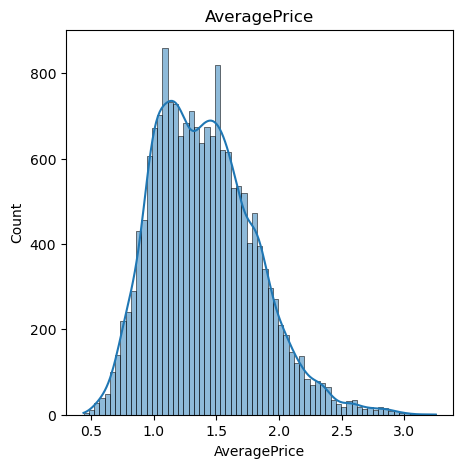

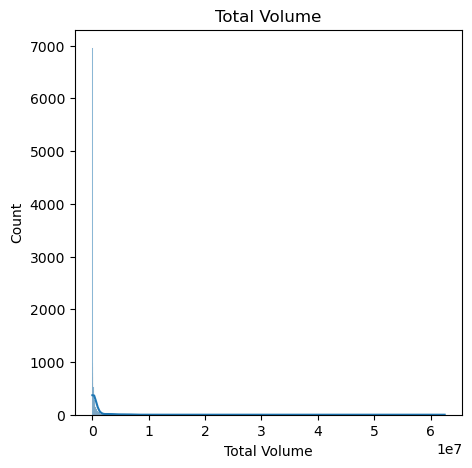

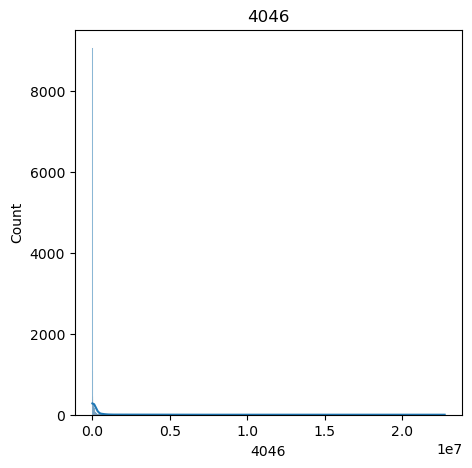

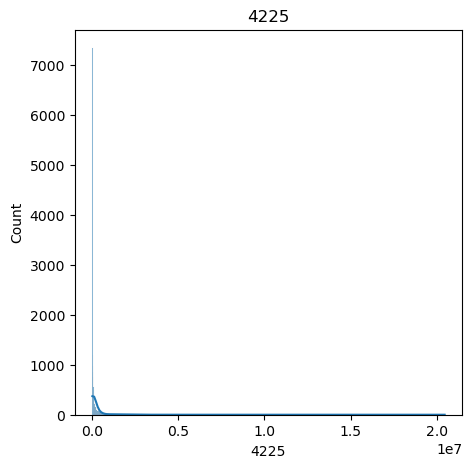

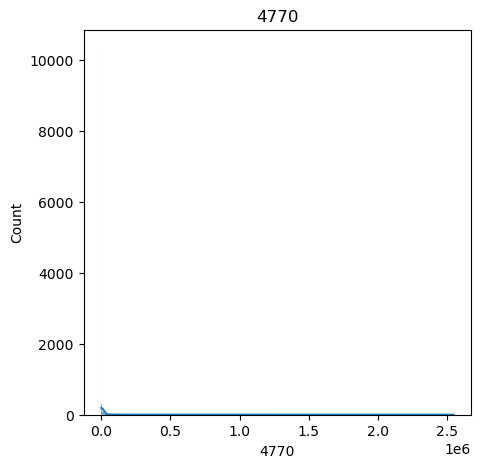

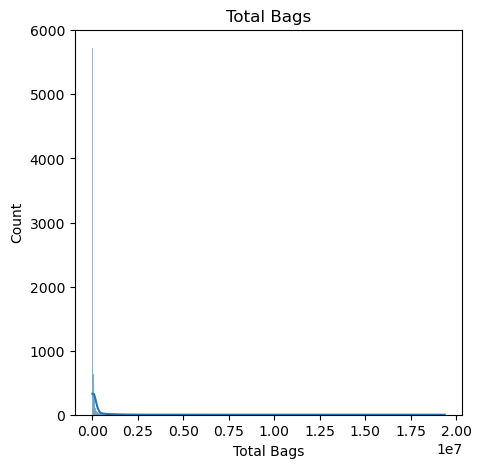

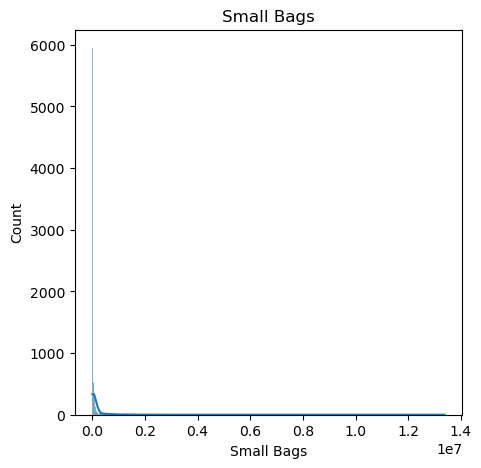

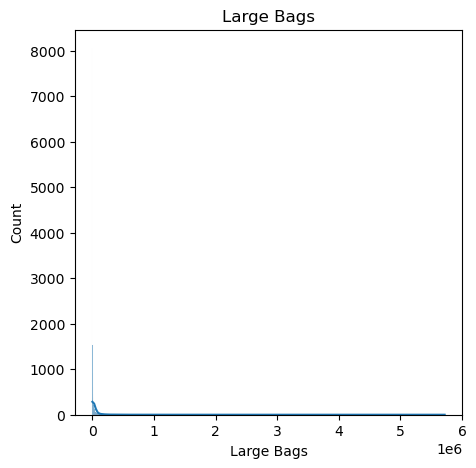

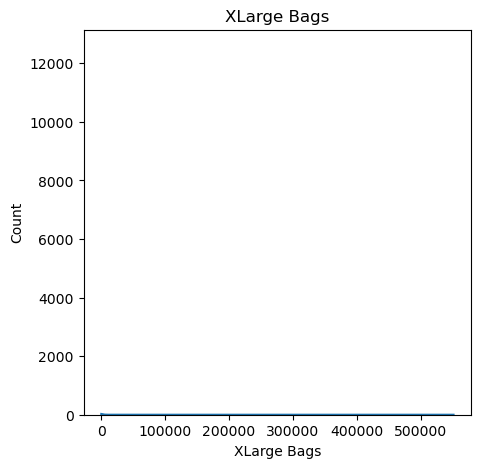

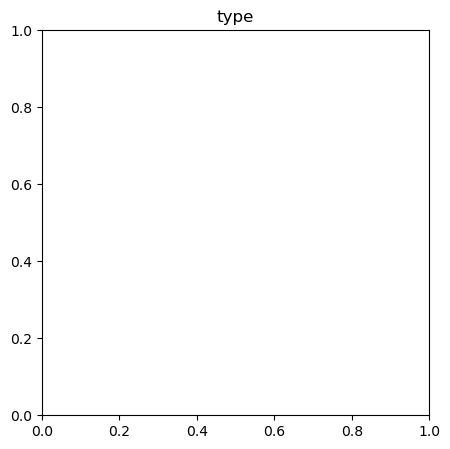

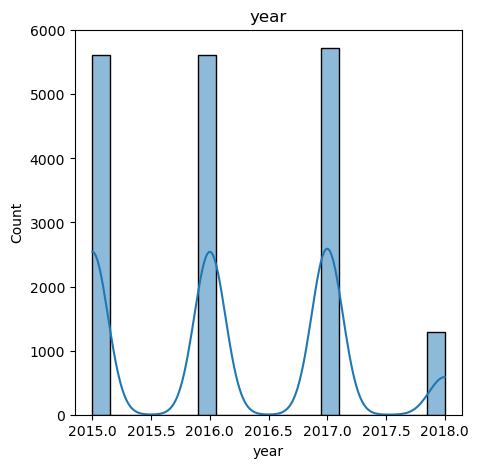

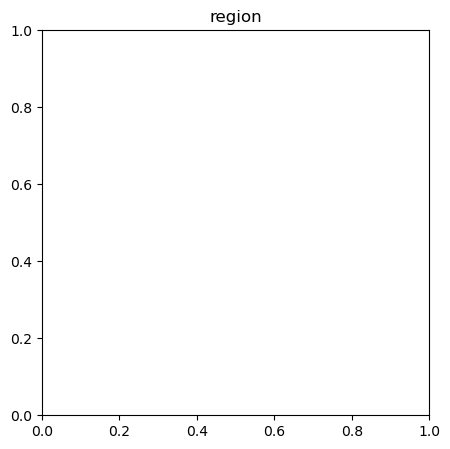

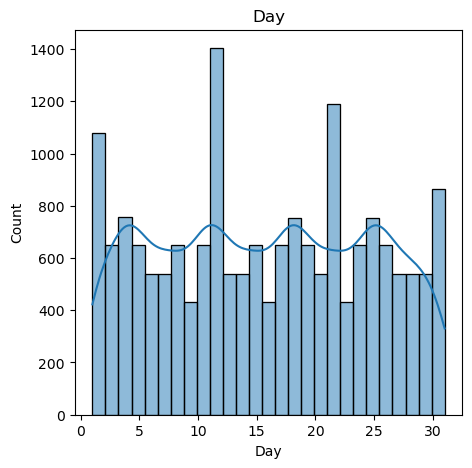

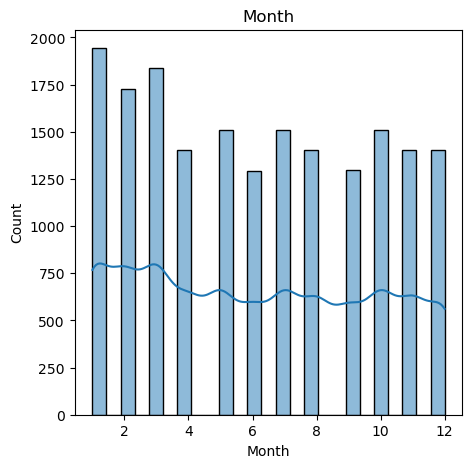

In [14]:
#Distribution of Skewness
for column in avocado_1:
    plt.figure(column, figsize = (5,5))
    plt.title(column)
    if avocado_1[column].dtypes != "object":
        sns.histplot(x = column,data = avocado_1,kde=True)

## Bivariate Analysis

-- Now we shall see how the variables(features) are related to each other and what can we derive from them. Also we shall check how the independent variables are correlated to the dependent feature.

<Figure size 500x500 with 0 Axes>

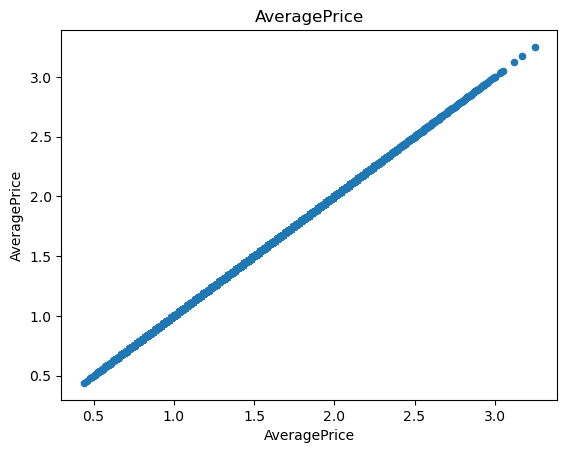

<Figure size 500x500 with 0 Axes>

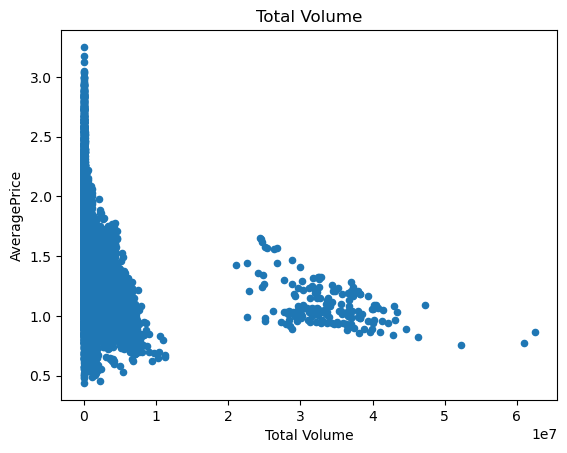

<Figure size 500x500 with 0 Axes>

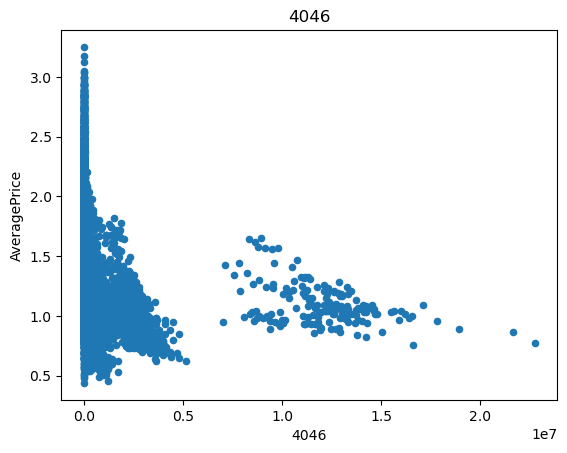

<Figure size 500x500 with 0 Axes>

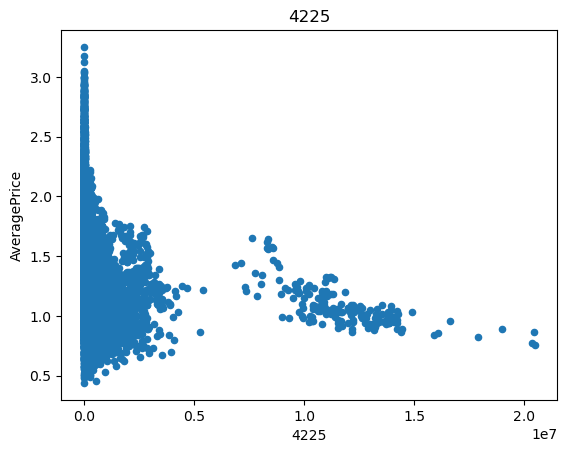

<Figure size 500x500 with 0 Axes>

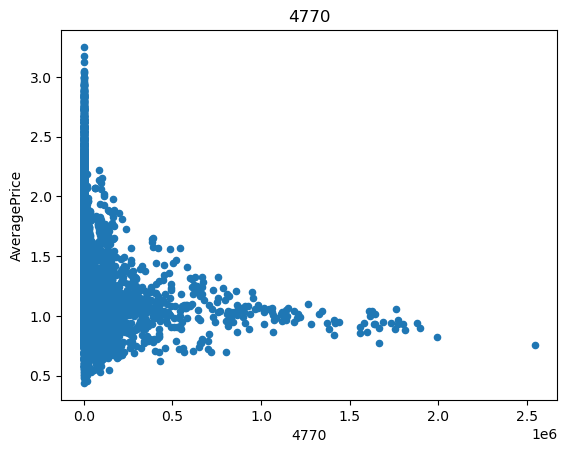

<Figure size 500x500 with 0 Axes>

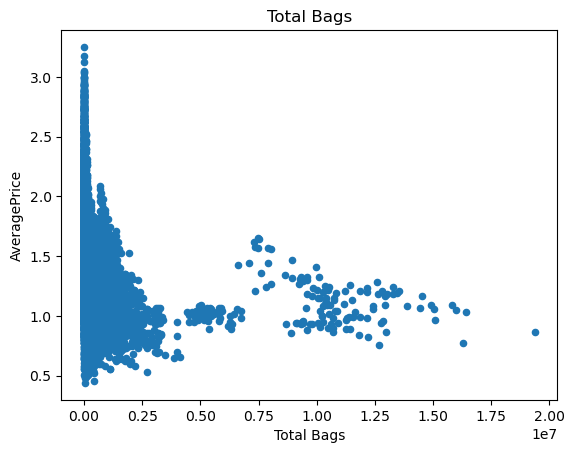

<Figure size 500x500 with 0 Axes>

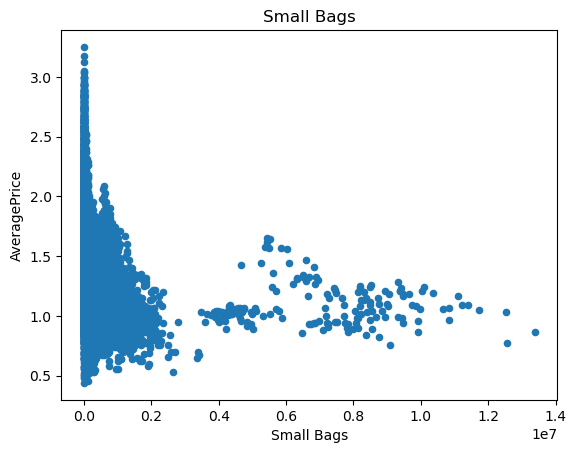

<Figure size 500x500 with 0 Axes>

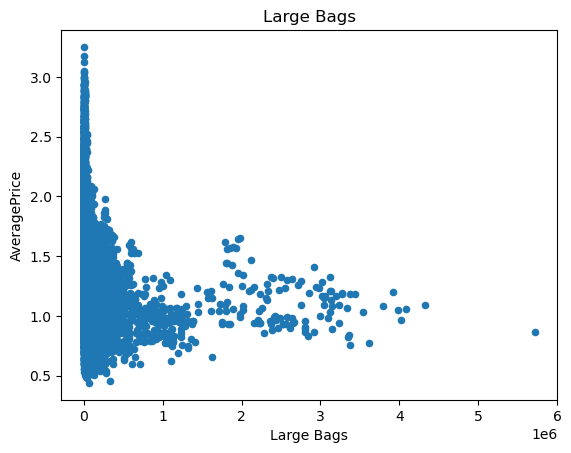

<Figure size 500x500 with 0 Axes>

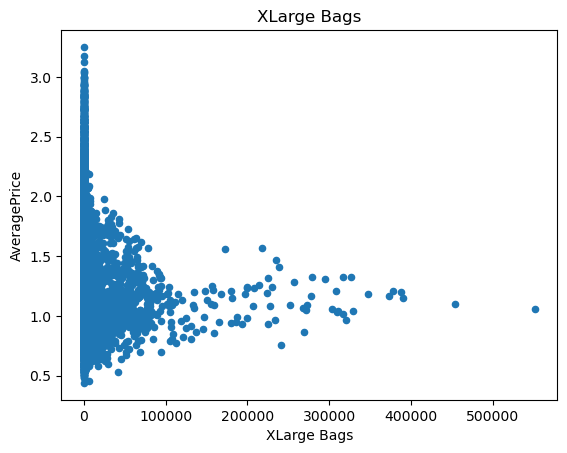

<Figure size 500x500 with 0 Axes>

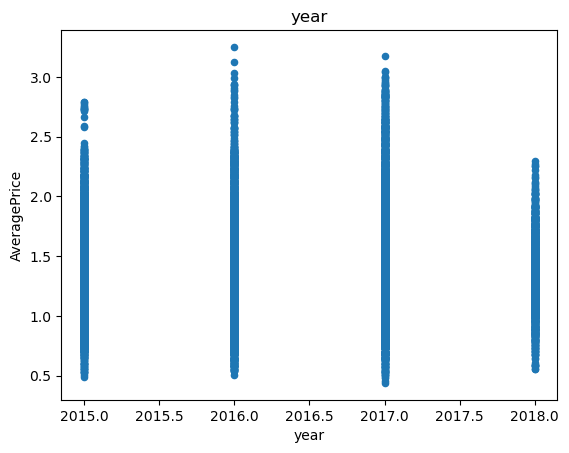

<Figure size 500x500 with 0 Axes>

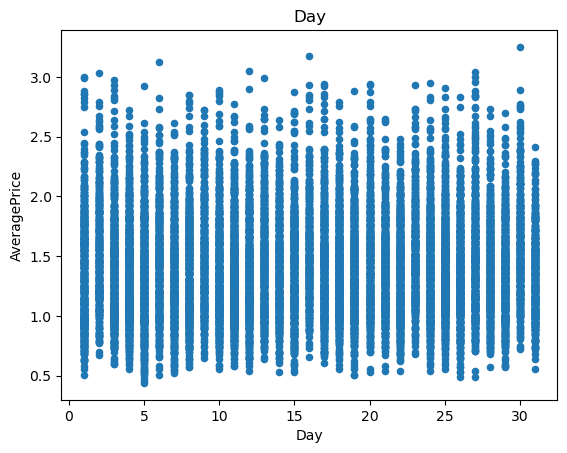

<Figure size 500x500 with 0 Axes>

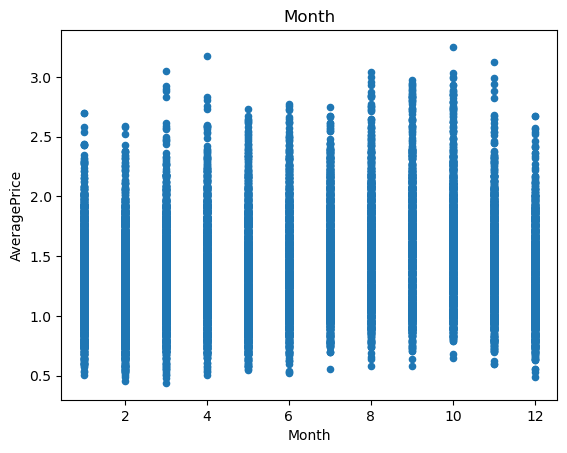

In [15]:
for column in avocado_1:
    if avocado_1[column].dtypes != "object":
        plt.figure(column, figsize = (5,5))
        avocado_1.plot.scatter(x = column,y = 'AveragePrice')
        plt.title(column)

-- From the above scatterplots, between the numerical columns and the output feature 'AveragePrice',we can observe that there seems to be a lot of outliers and none of the features seems to positively correlated to the target variable..so we shall do further analysis to prove it..

<Figure size 1000x1000 with 0 Axes>

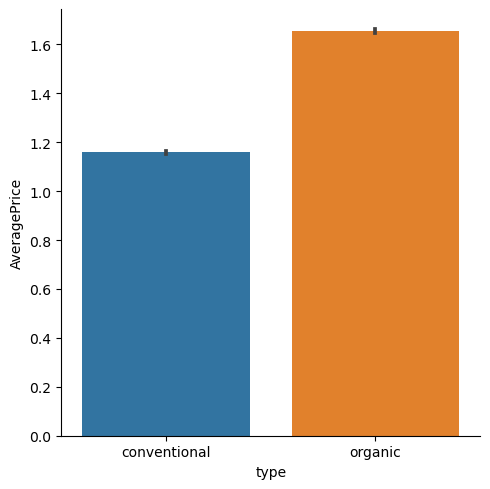

In [16]:
#For the 'type' feature
plt.figure(figsize=(10,10))
sns.catplot(x='type',y = 'AveragePrice',kind='bar',data = avocado_1)
plt.show()

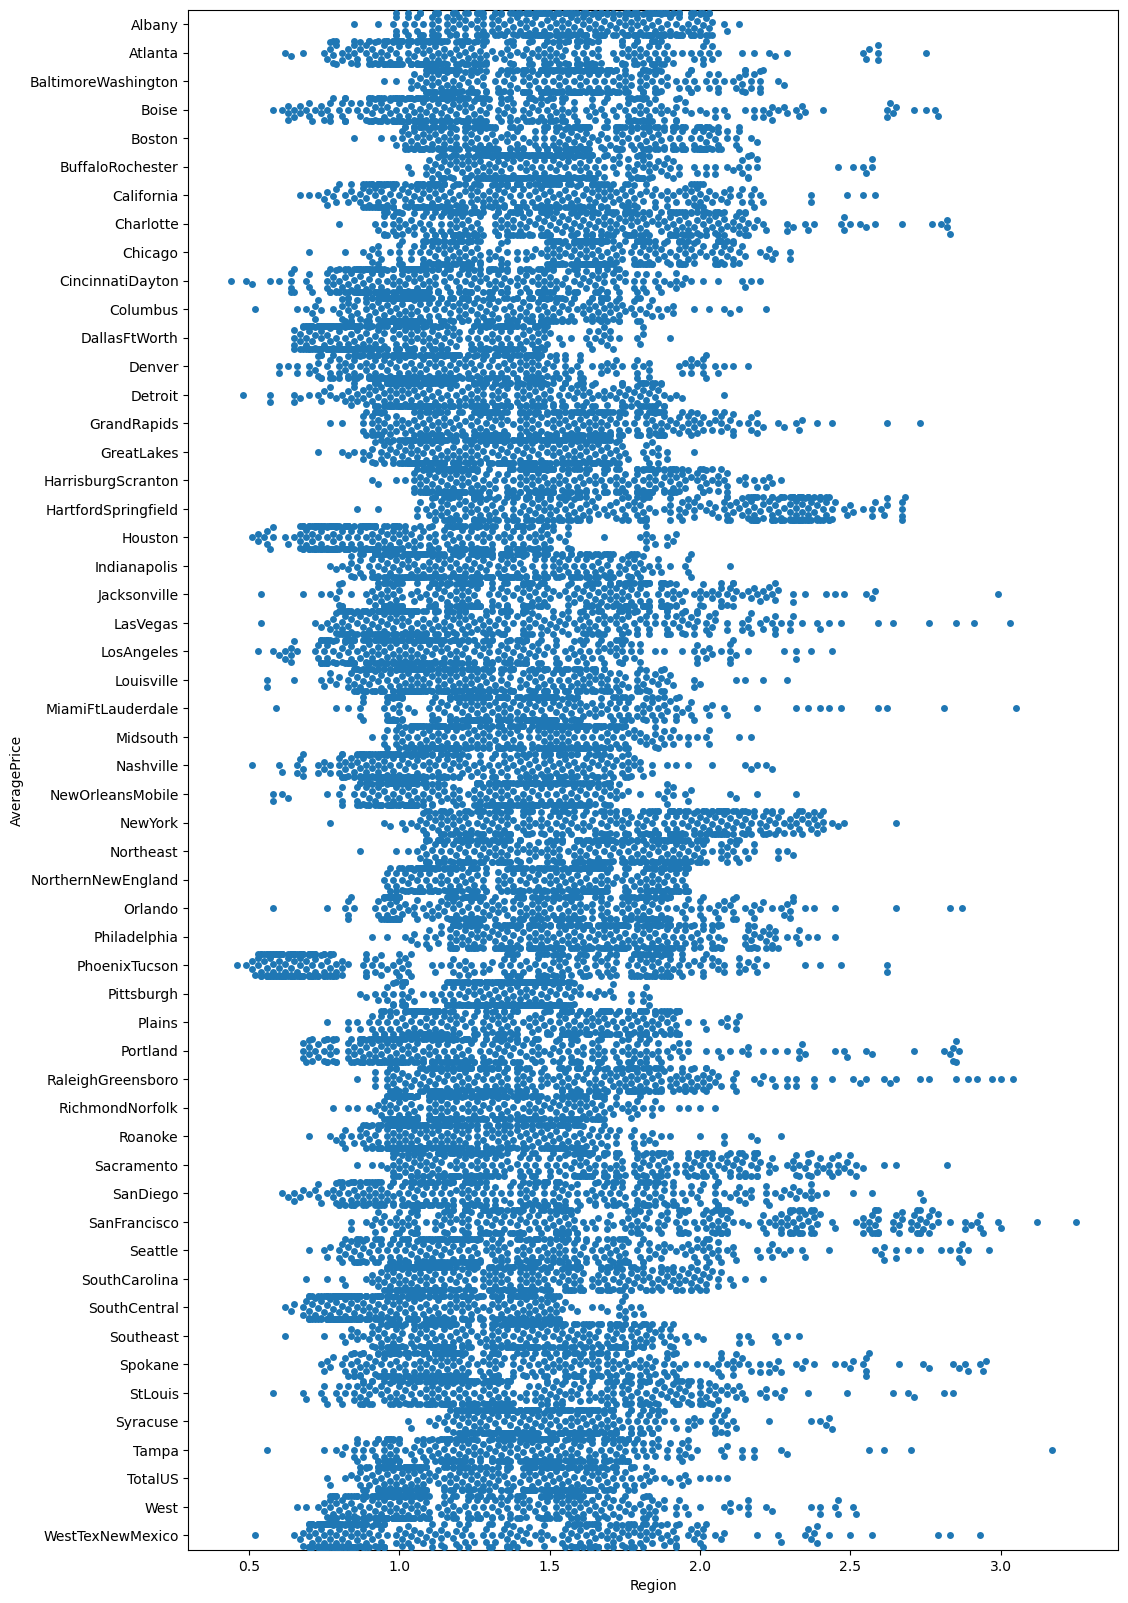

In [17]:
#For the 'region' feature
plt.figure(figsize = (12,20))
sns.swarmplot(x='AveragePrice' , y='region', data = avocado_1)
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.show()

-- From the above swarmplot, we see that the average prices of Avocados are more in the regions of 'SanFranciso','LasVegas' and 'MiamiFtLauderdale'..

## Multivariate Analysis 

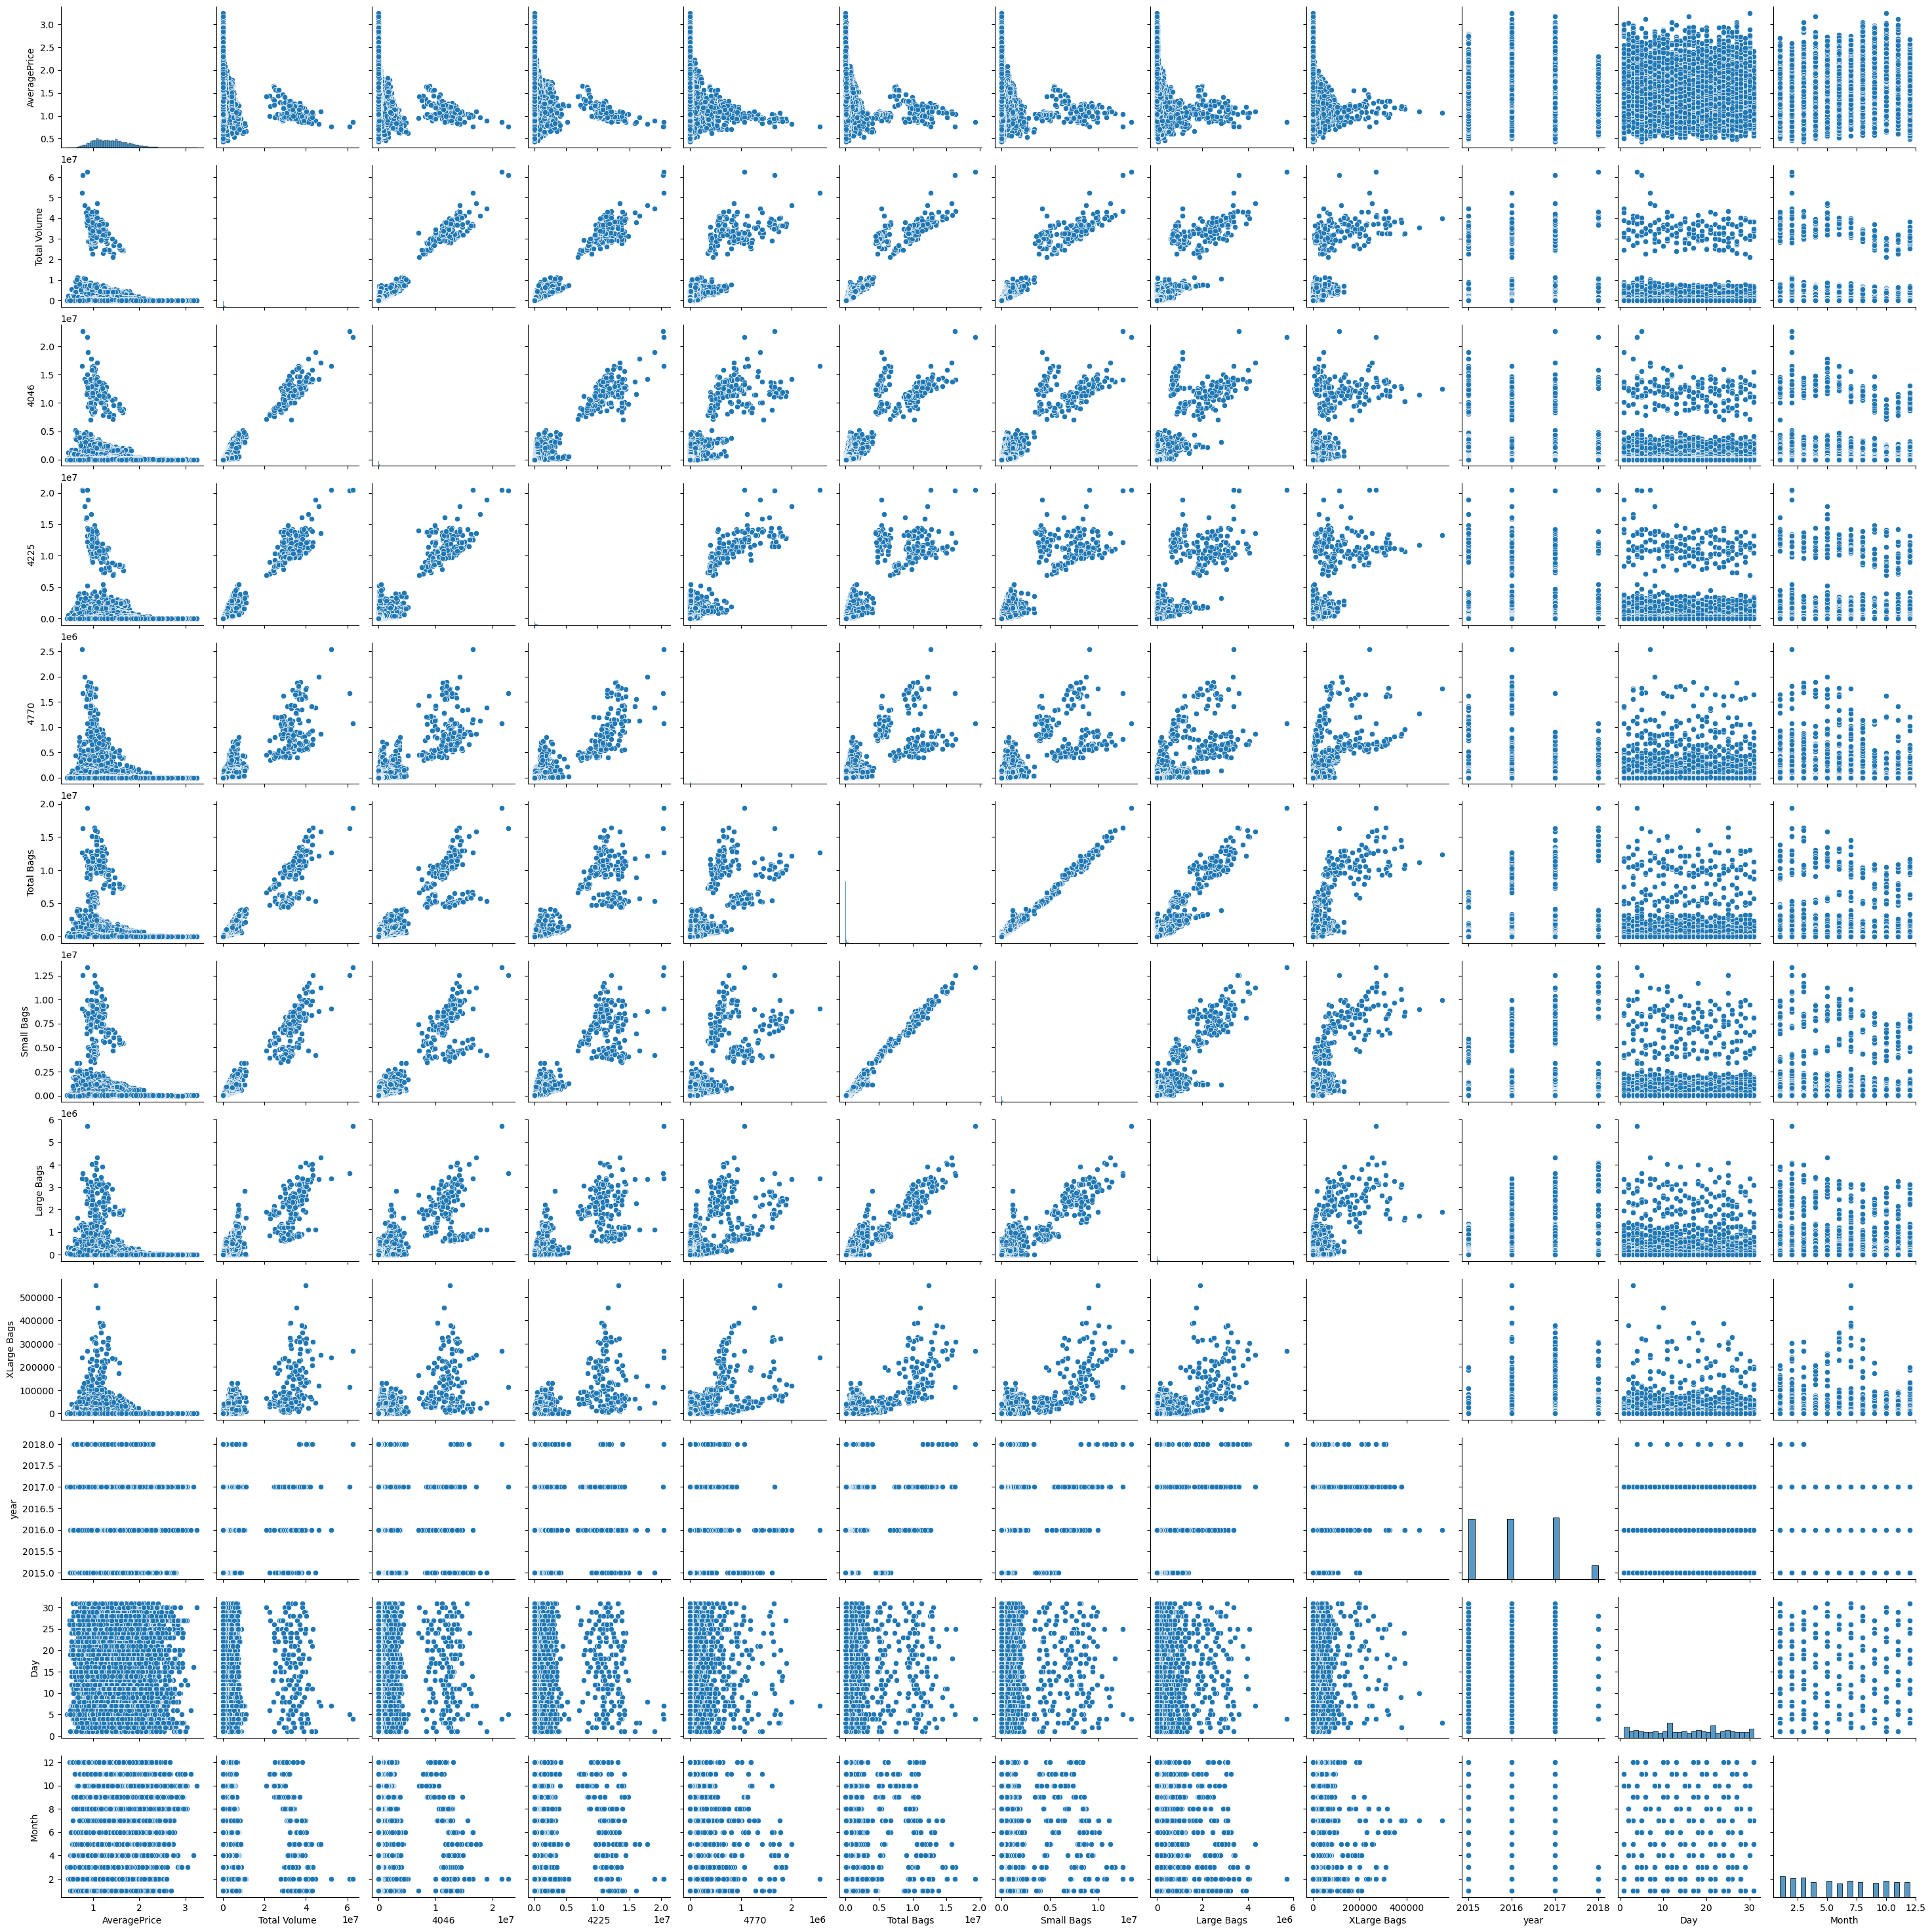

In [18]:
sns.pairplot(avocado_1)

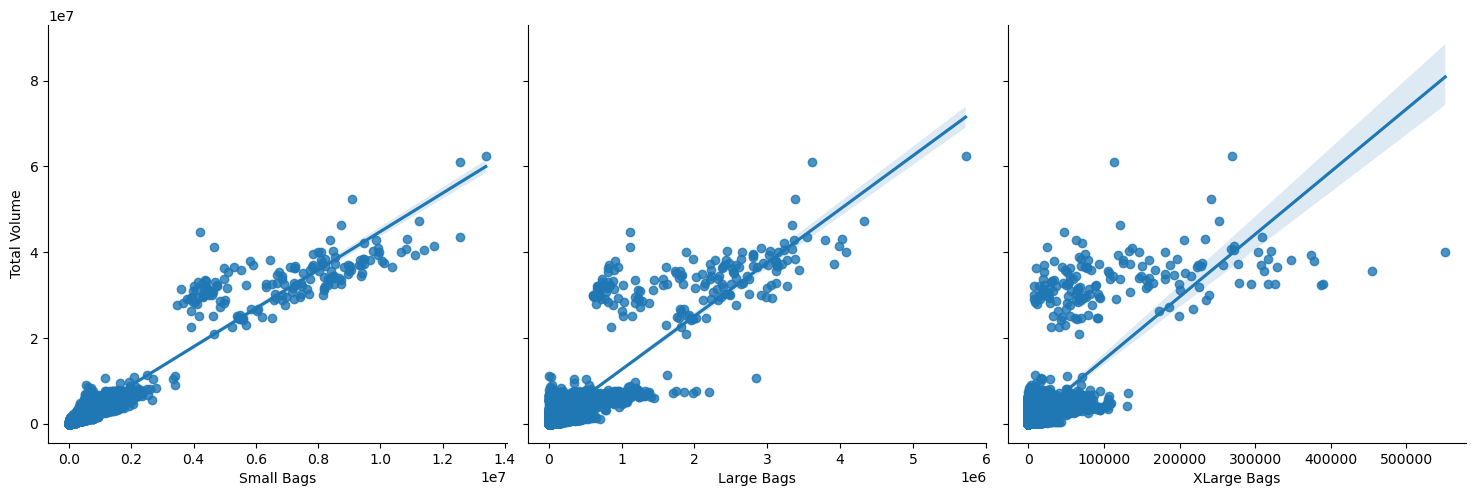

In [19]:
#Total Volume vs Small,Large and XLarge
sns.pairplot(avocado_1,x_vars = ['Small Bags','Large Bags','XLarge Bags'],y_vars = 'Total Volume',size=5,kind = 'reg')

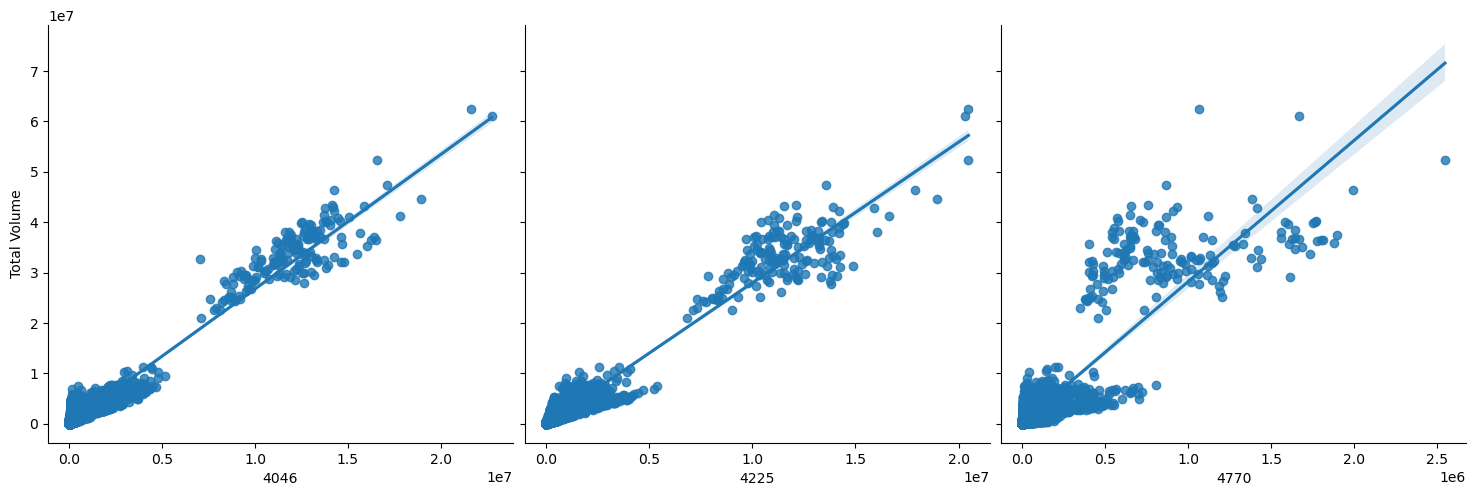

In [20]:
#Total Volume vs 4046,4225,4770
sns.pairplot(avocado_1,x_vars = ['4046','4225','4770'],y_vars = 'Total Volume',size=5,kind = 'reg')

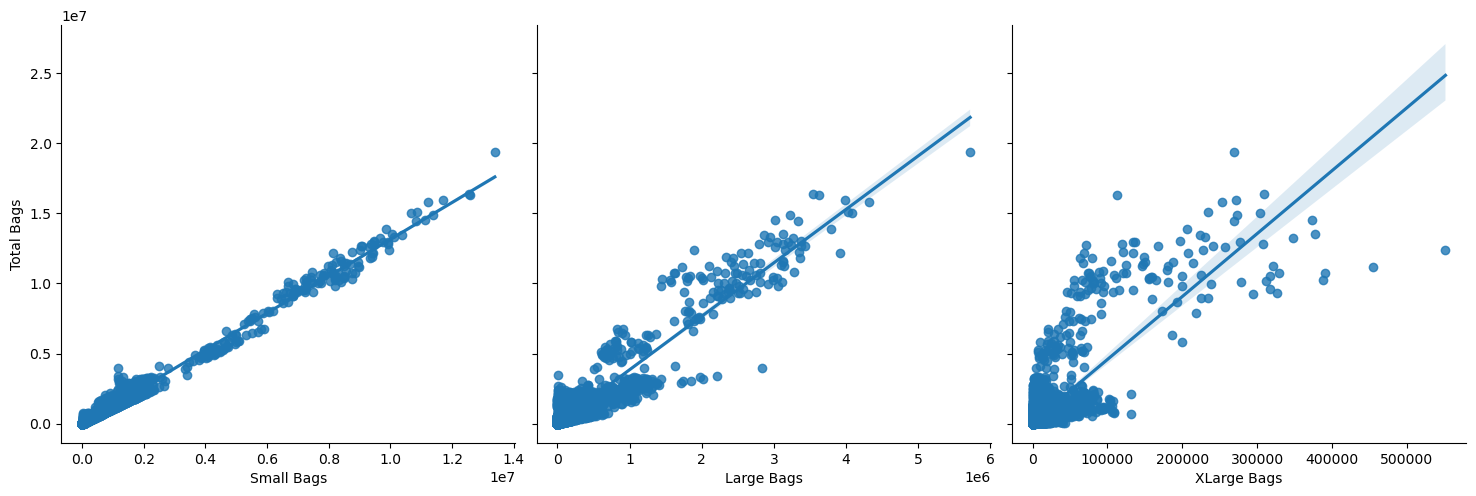

In [21]:
#TotalBags vs Small,Large and XLarge
sns.pairplot(avocado_1,x_vars = ['Small Bags','Large Bags','XLarge Bags'],y_vars = 'Total Bags',size=5,kind = 'reg')

--From the above regplots, we can observe that there is a strong positive correlation between Total Volume vs Small bags and Total Bags vs Small Bags..

And there is not much strong correlation between Total Volume vs XLarge Bags and Total Bags vs XLarge Bags..And the relation between Total Volume vs Large Bags and Total Bags vs Large Bags is moderate..

And there is also strong moderate correlation between Total Volume vs 4046 and Total Volume vs 4225...and again not much strong relation between Total Volume vs 4770..

Therefore, we can see that there may be signs of multicollinearity present among the features..we shall look into them in the later part of the analysis..

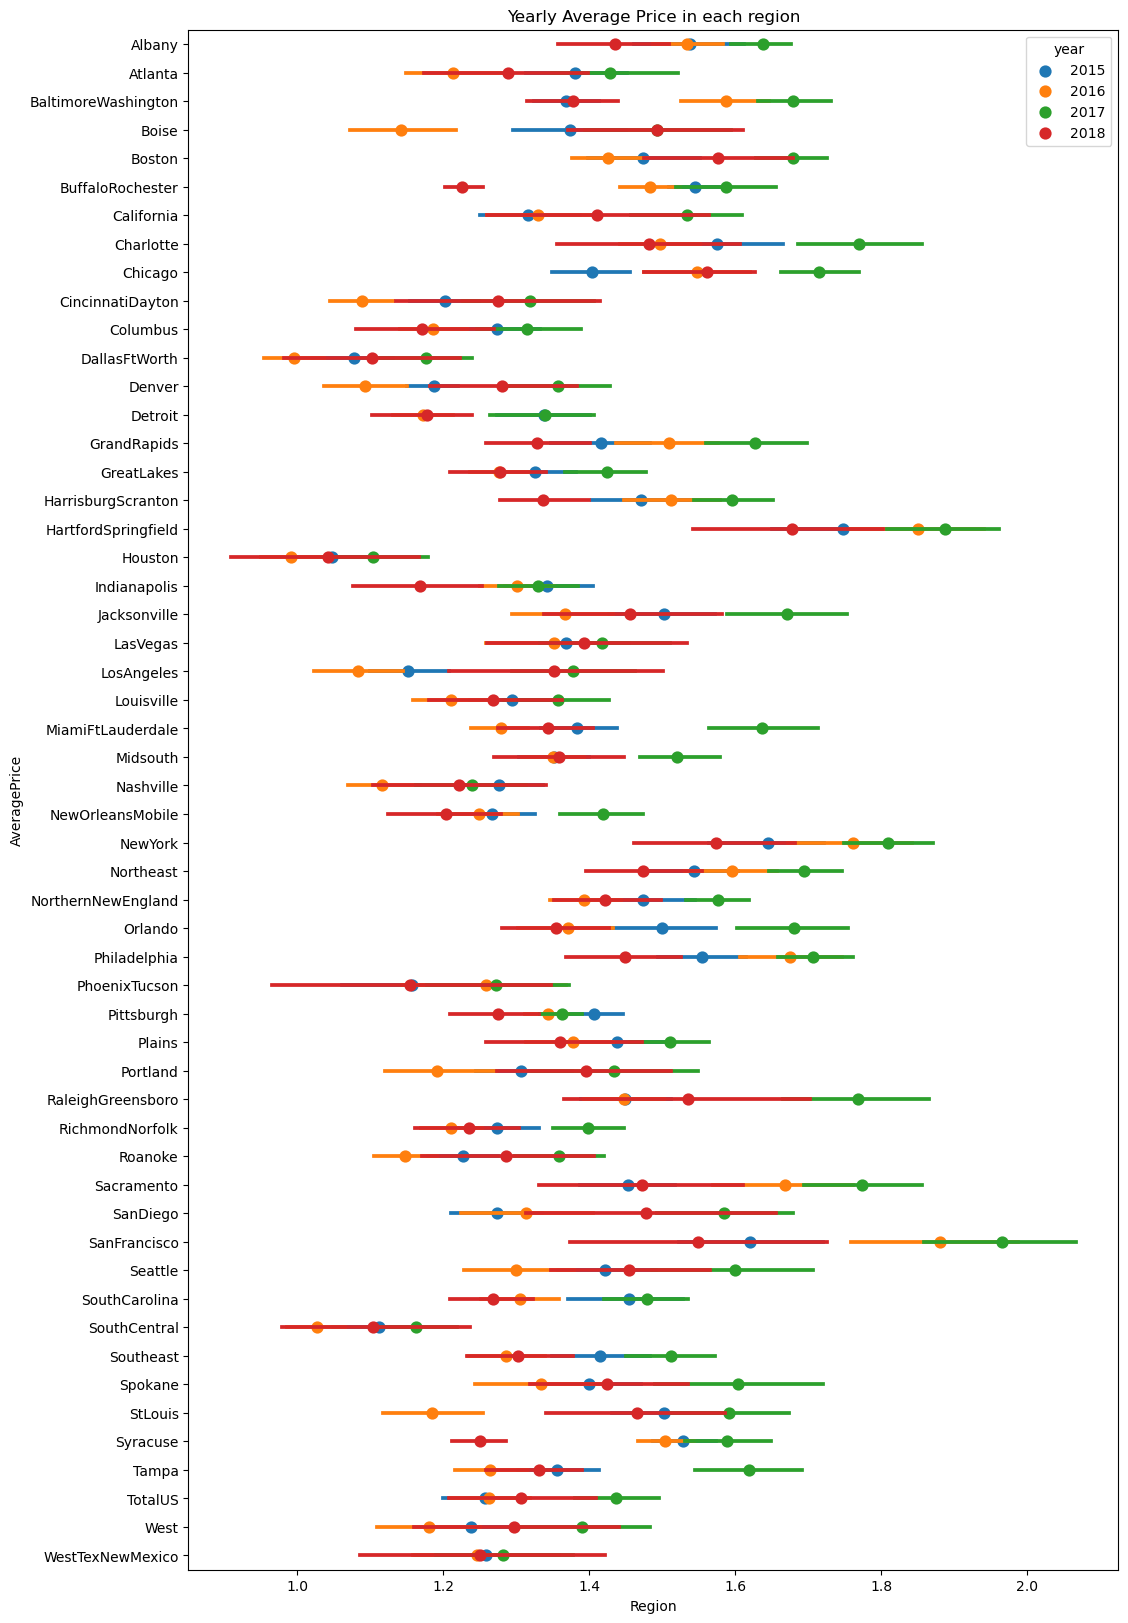

In [22]:
#Relationship between Region and Year distribution
plt.figure(figsize = (12,20))
sns.pointplot(x='AveragePrice' , y='region', data = avocado_1, hue = 'year',join = False)
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title('Yearly Average Price in each region')
plt.show()

-- From the above plot, we can see that in the year 2017 the 'San Francisco' region had the maximum consumption of Avocado..

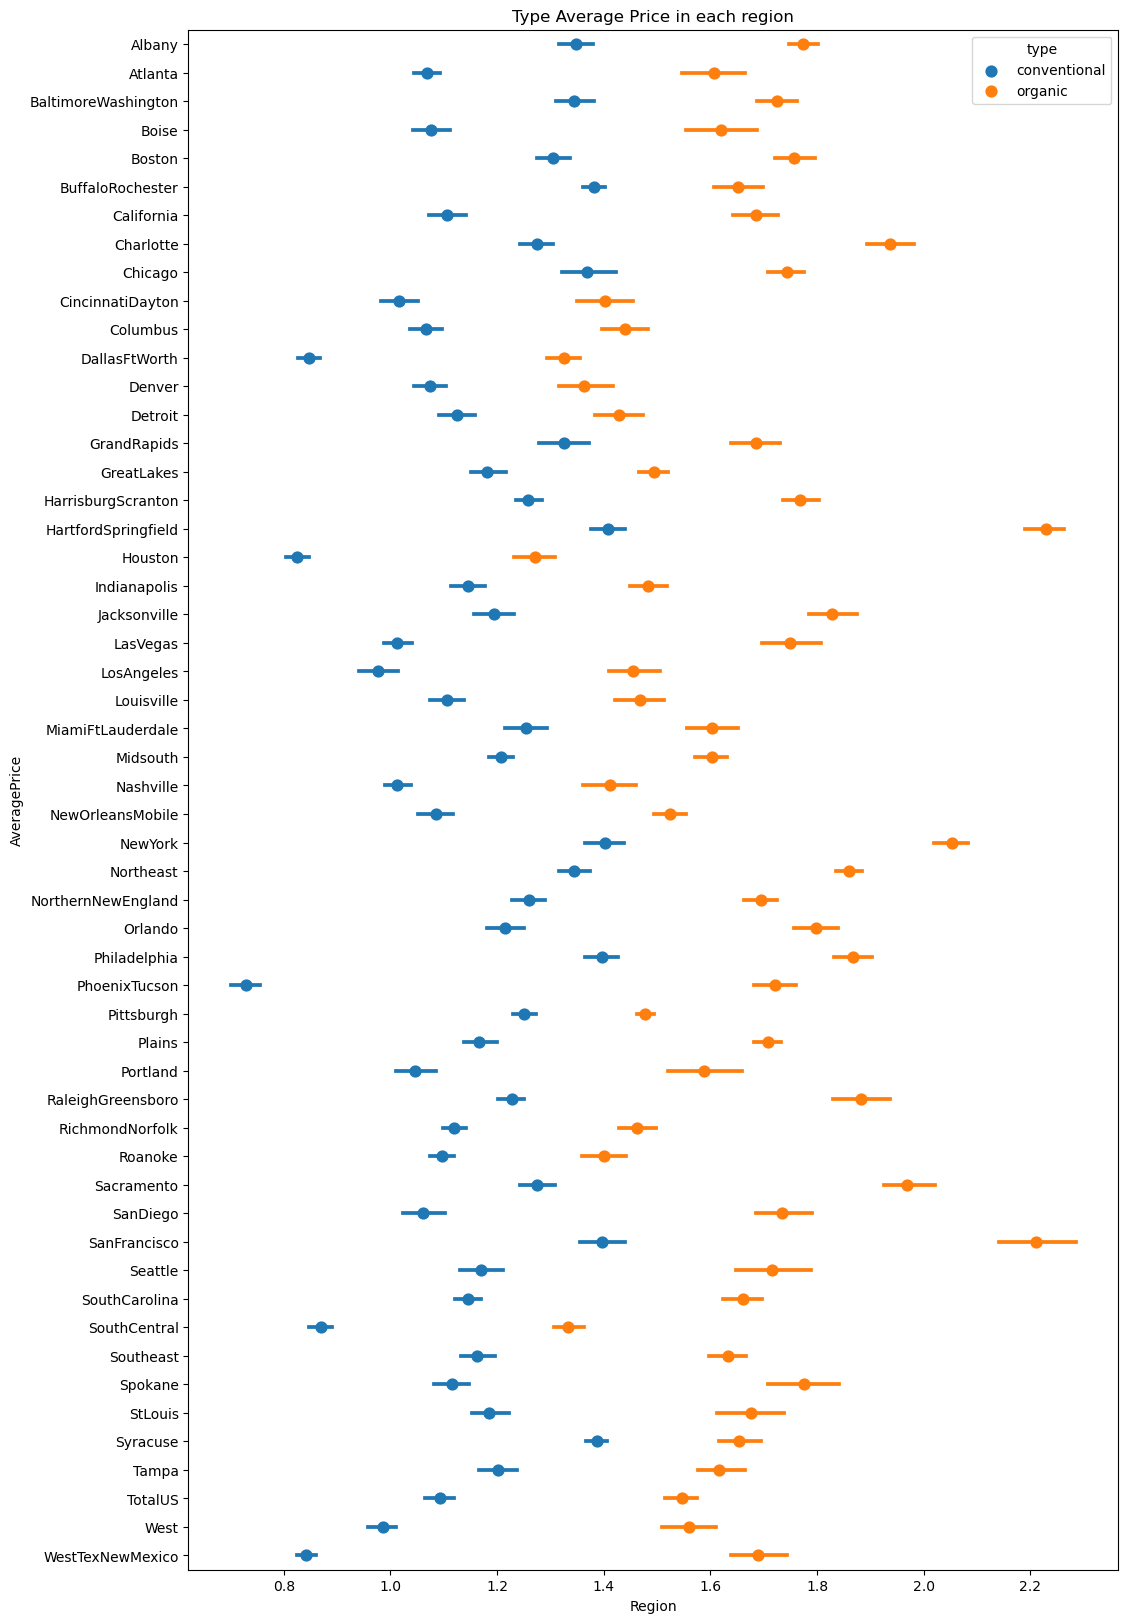

In [23]:
#Relationship between Region and Type of Avocado distribution
plt.figure(figsize = (12,20))
sns.pointplot(x='AveragePrice' , y='region', data = avocado_1, hue = 'type',join = False)
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title('Type Average Price in each region')
plt.show()

-- From the above barplot(between 'type' and 'AveragePrice'),we observe that the average price of organic type of avocados is higher than that of the average price of conventional type of avocado..

### Feature Engineering and Feature Selection 

In [24]:
numerical_features = [feature for feature in avocado_1.columns if ((avocado_1[feature].dtypes !='O'))]
numerical_features

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year',
 'Day',
 'Month']

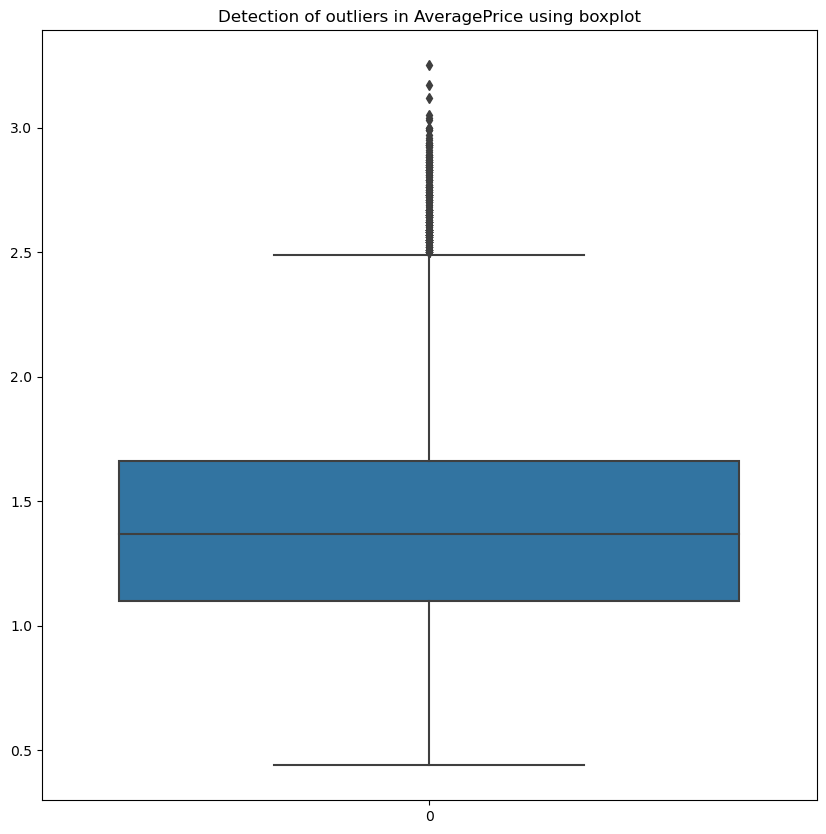

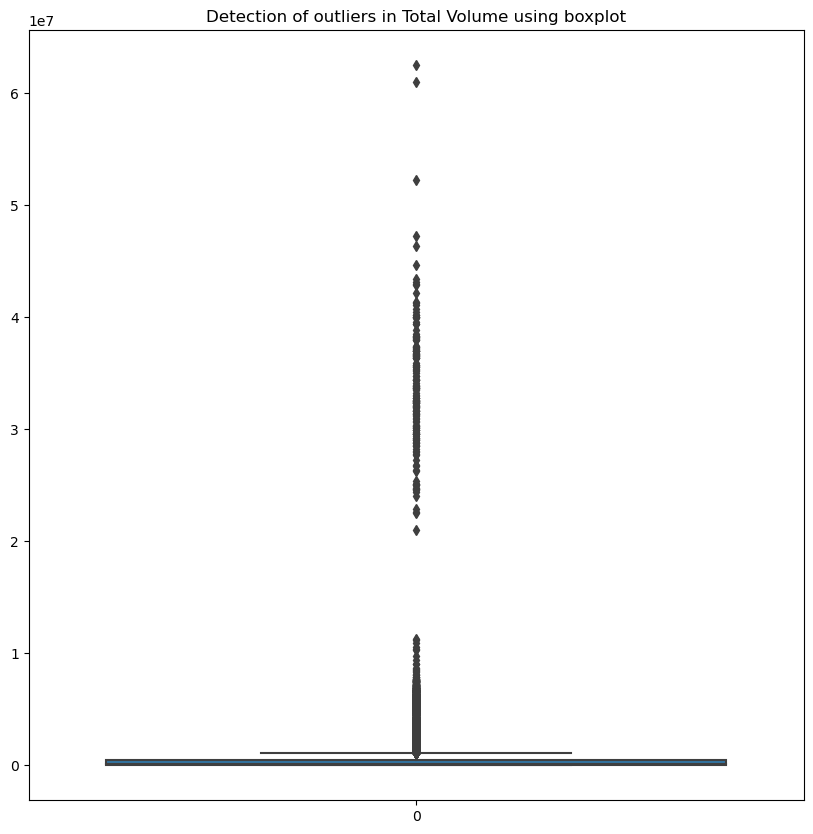

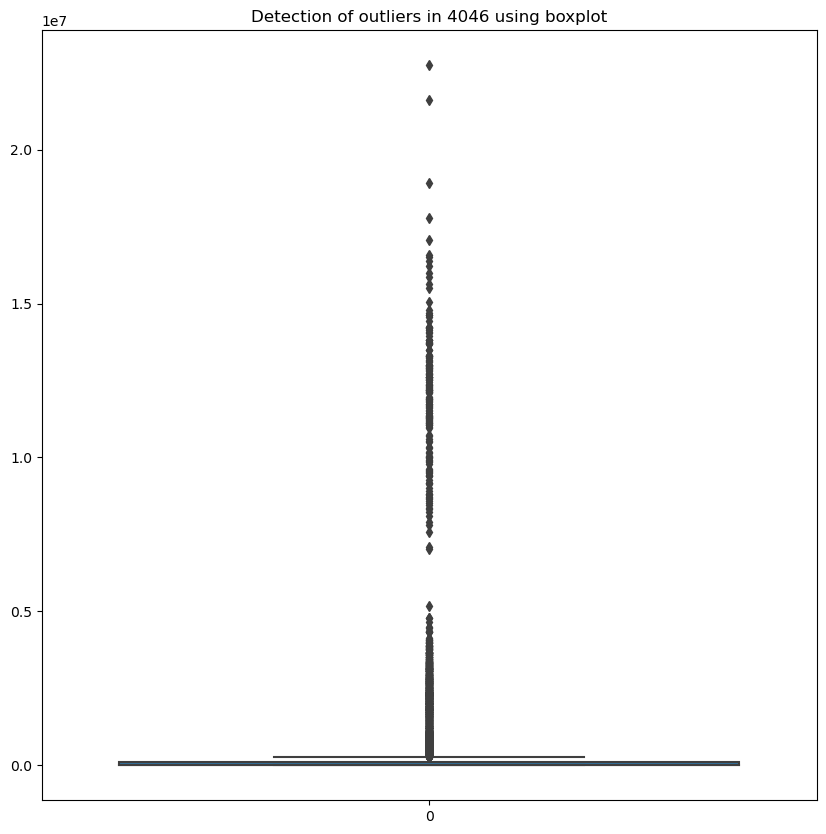

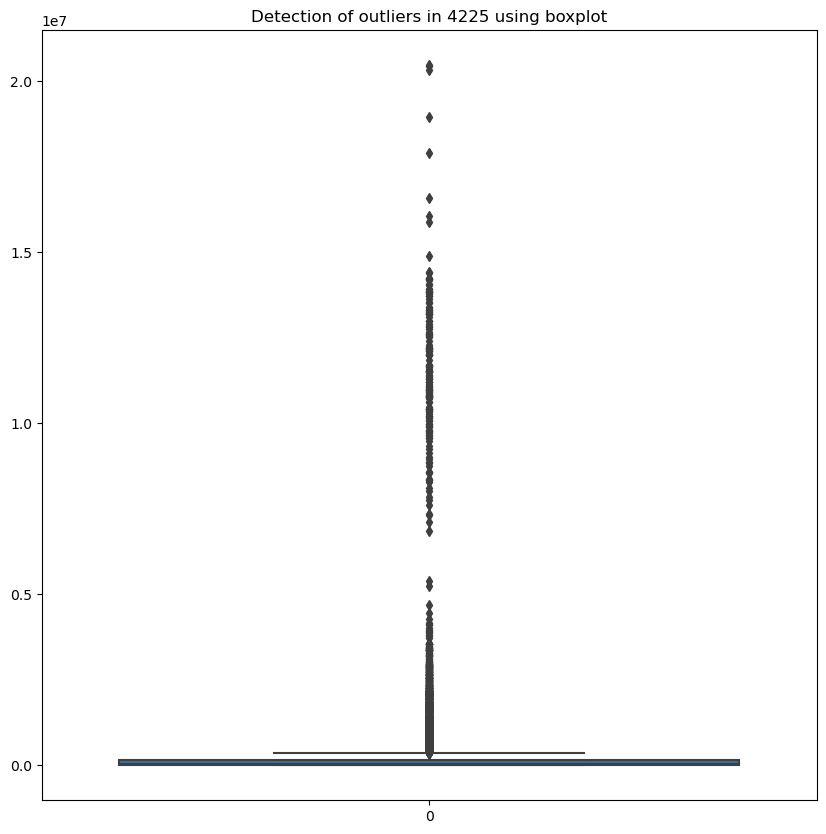

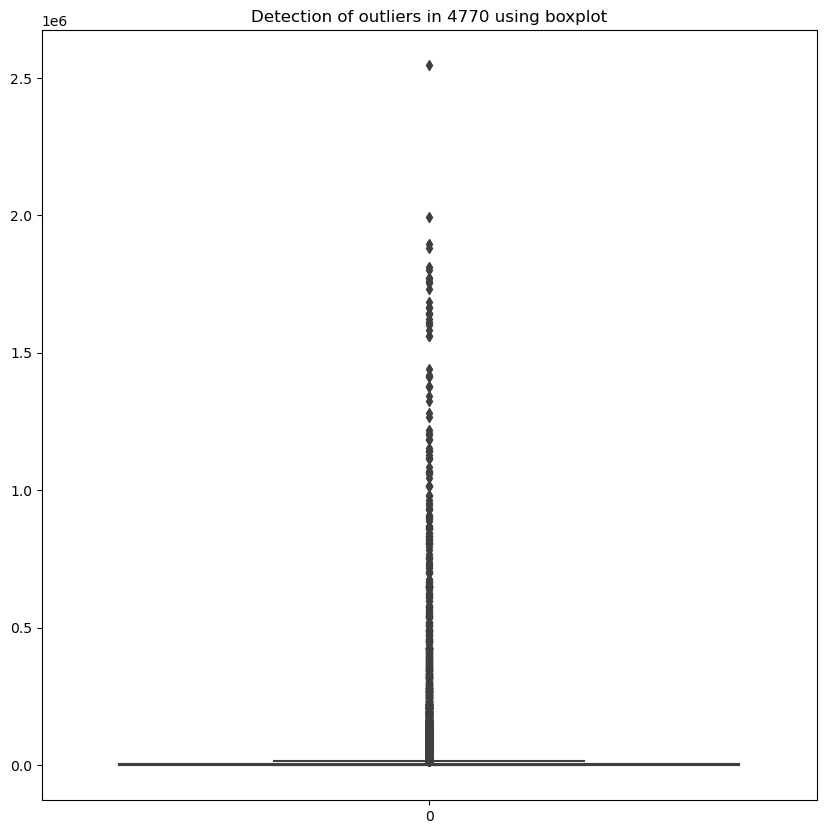

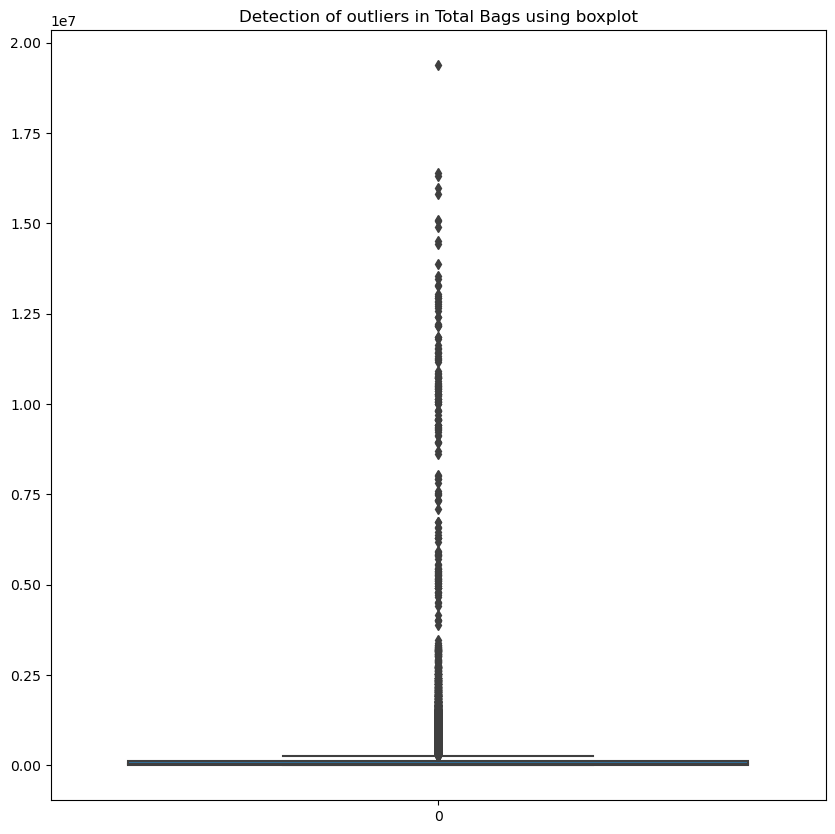

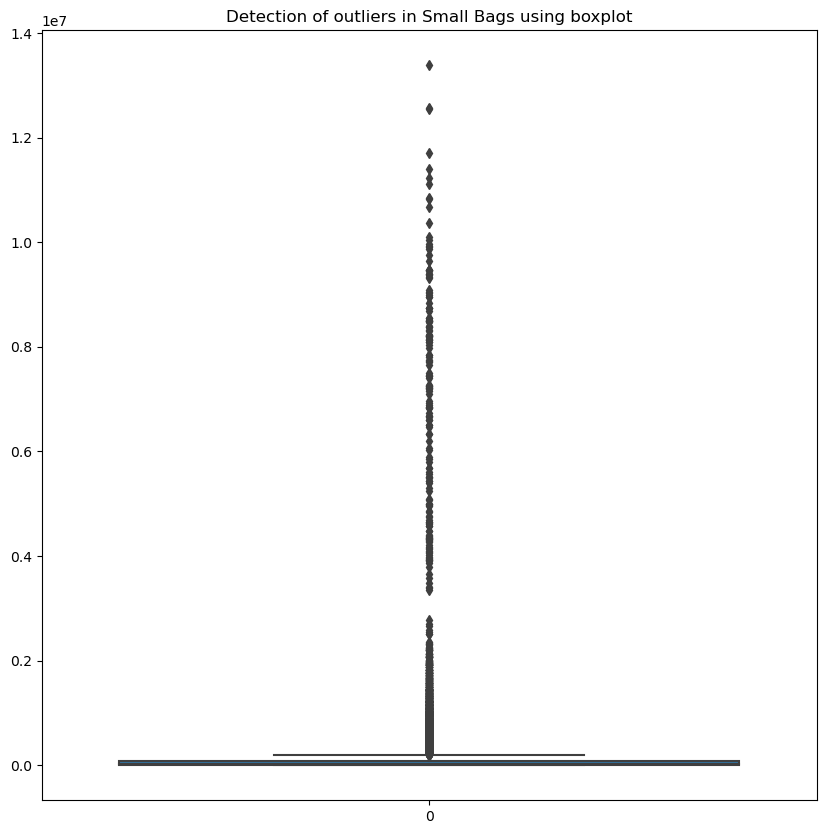

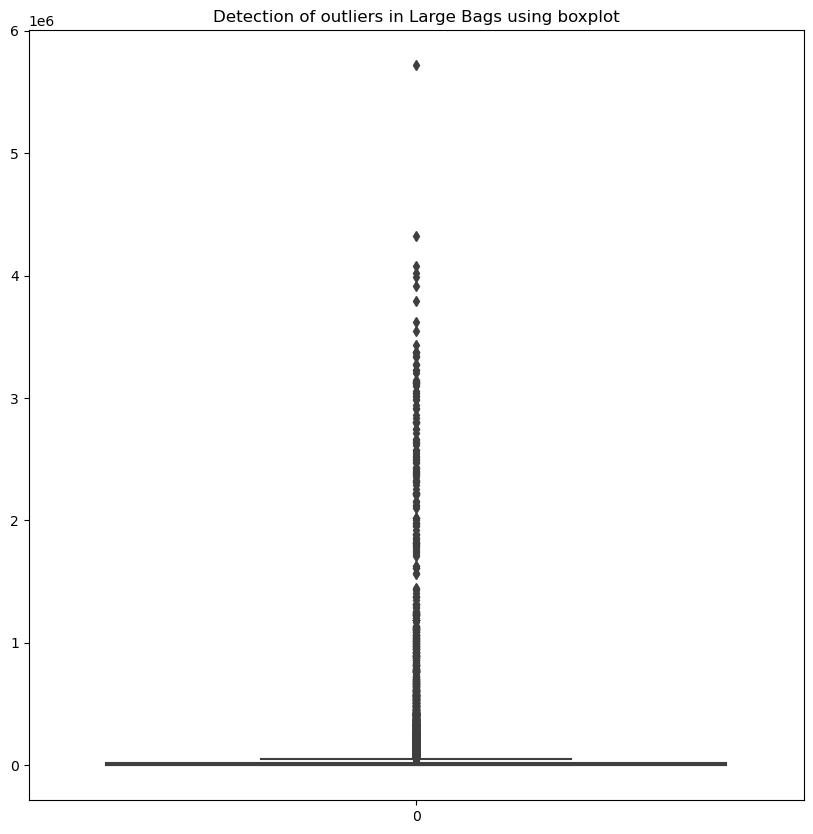

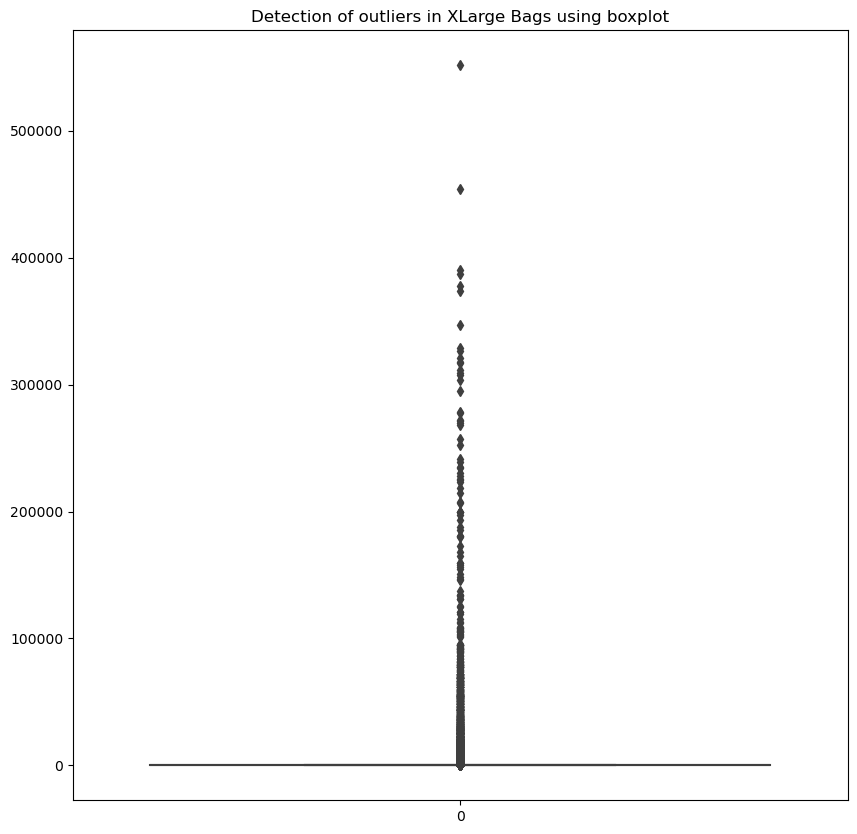

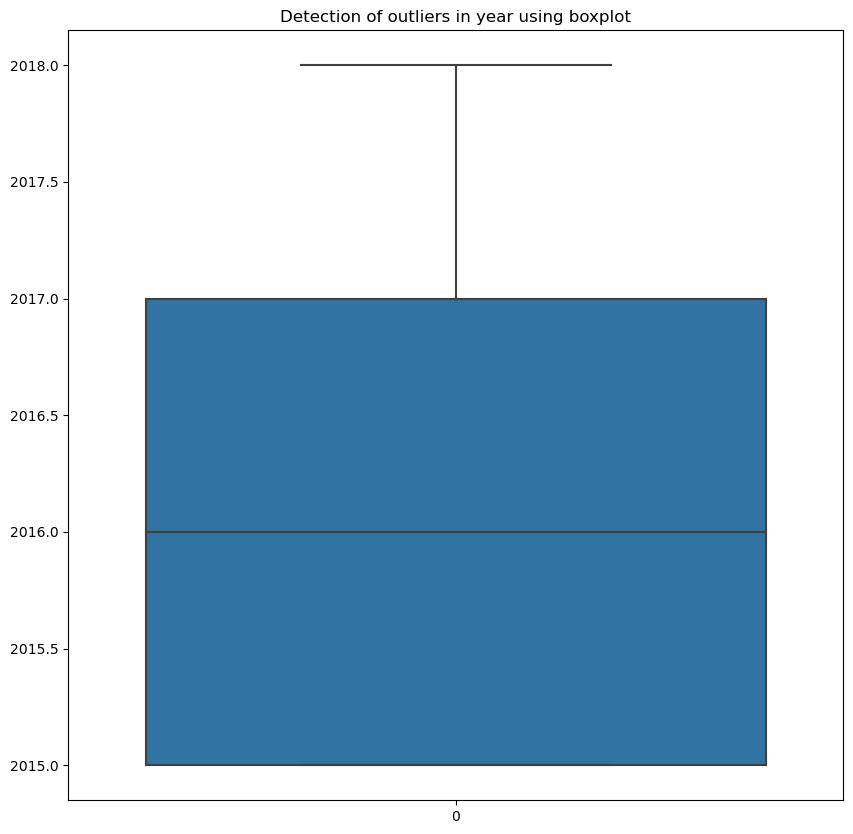

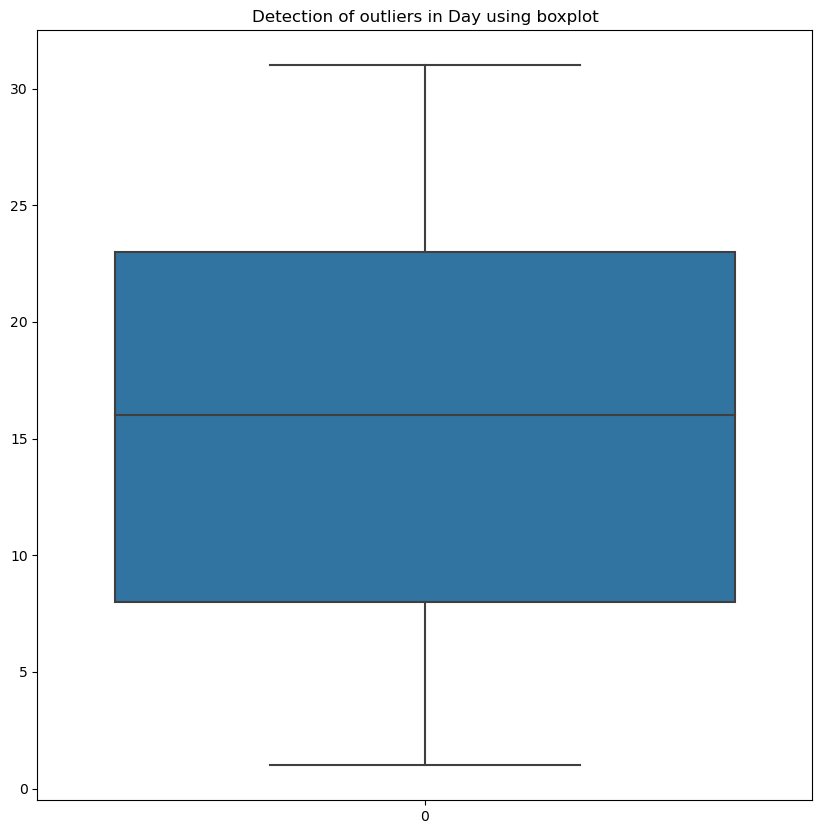

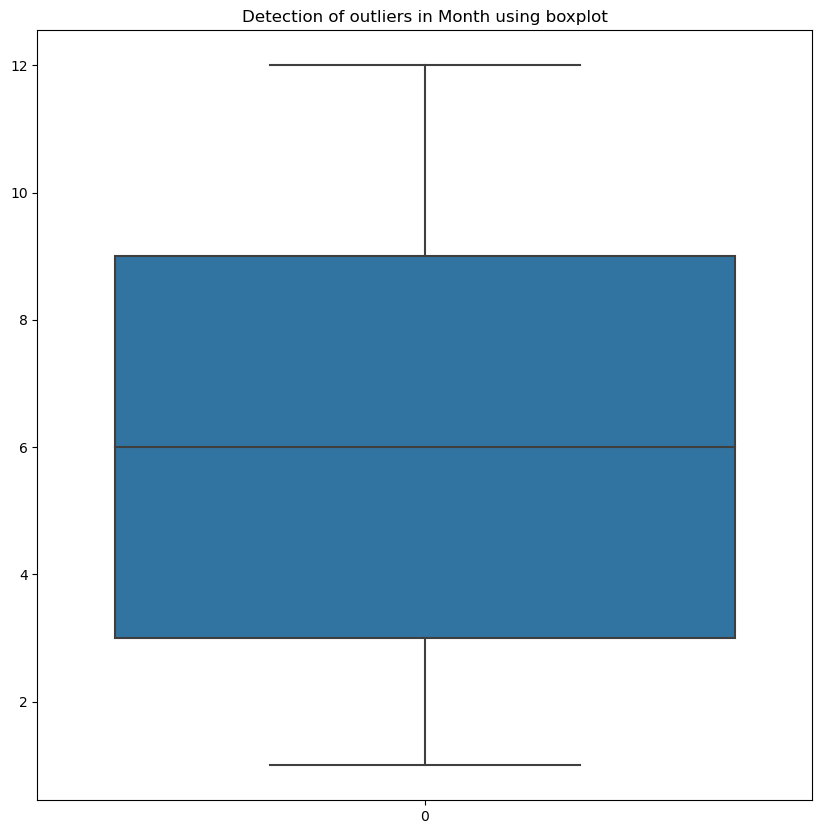

In [25]:
#Now let's detect outliers from the dataset and remove them only if needed..
for numerical_feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(avocado_1[numerical_feature])
    plt.title('Detection of outliers in {} using boxplot'.format(numerical_feature))
plt.show()

In [26]:
#Removing outliers
from scipy.stats import zscore
numerical_columns = avocado_1.select_dtypes(include=['number']).columns
z_scores = np.abs(zscore(avocado_1[numerical_columns]))
threshold = 3
avocado_2 = avocado_1[(z_scores < threshold).all(axis = 1)]

In [27]:
avocado_2

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany    6     12  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    4      2  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    7      1  

[17651 rows x 14 columns]

-- Outliers are removed successfully..

In [28]:
#Correlation Analysis
avocado_cor = avocado_2.corr()
avocado_cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   
Day               0.026819     -0.006010 -0.007401 -0.009520  0.000920   
Month             0.149502     -0.018645 -0.015797 -0.019844 -0.027245   

              Total Bags  Small Bags  Large Bags  XLarge Bags      year  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.091704   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.004866   
4046            0.727981    0.706800    0.561060     0.415432 -0.034636   
4225            0.757786    0.778761    0.451711     0.392030 -0.040234   
4770            0.557980    0.571512    0.323747     0.495976 -0.082054   
Total Bags      1.000000    0.978213    0.746946     0.581690  0.103442   
Small Bags      0.978213    1.000000    0.593155     0.597700  0.086639   
Large Bags      0.746946    0.593155    1.000000     0.296864  0.119543   
XLarge Bags     0.581690    0.597700    0.296864     1.000000  0.108209   
year            0.103442    0.086639    0.119543     0.108209  1.000000   
Day             0.003311    0.005159   -0.004182     0.010532  0.004700   
Month          -0.010916   -0.013018   -0.001457     0.002843 -0.175287   

                   Day     Month  
AveragePrice  0.026819  0.149502  
Total Volume -0.006010 -0.018645  
4046         -0.007401 -0.015797  
4225         -0.009520 -0.019844  
4770          0.000920 -0.027245  
Total Bags    0.003311 -0.010916  
Small Bags    0.005159 -0.013018  
Large Bags   -0.004182 -0.001457  
XLarge Bags   0.010532  0.002843  
year          0.004700 -0.175287  
Day           1.000000  0.011917  
Month         0.011917  1.000000

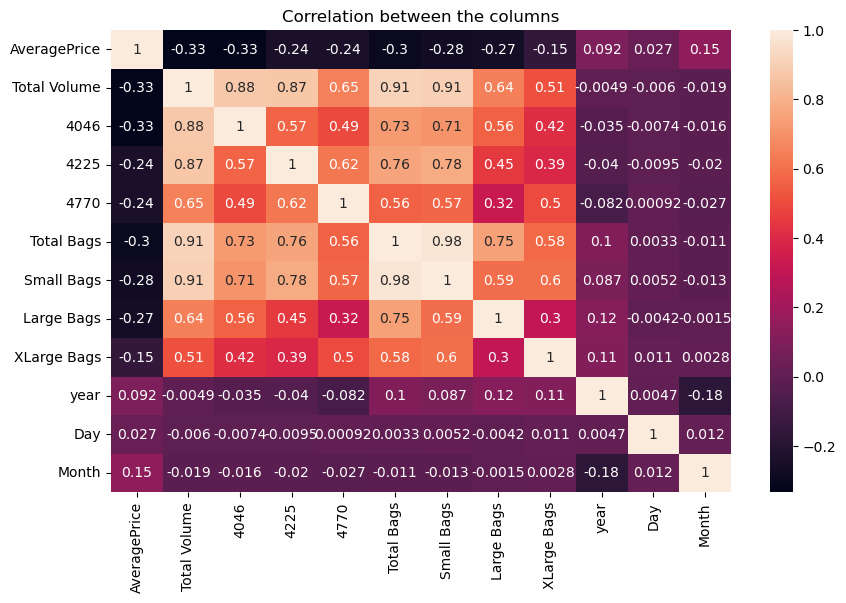

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(avocado_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

-- From the above correlation matrix heatmap,

We see that there is presence of multicollinearity in the dataset..

The Features - 'Total Bags' and 'Small bags' are multicollinear and also these feature are very negatively correlated with the target or output variable (Average Price)..

Therefore, we shall be droping the above mentioned columns..

In [30]:
#Dropping columns having multicollinearity
avocado_2.drop('Total Bags', axis=1, inplace = True)
avocado_2.drop('Small Bags', axis=1, inplace = True)

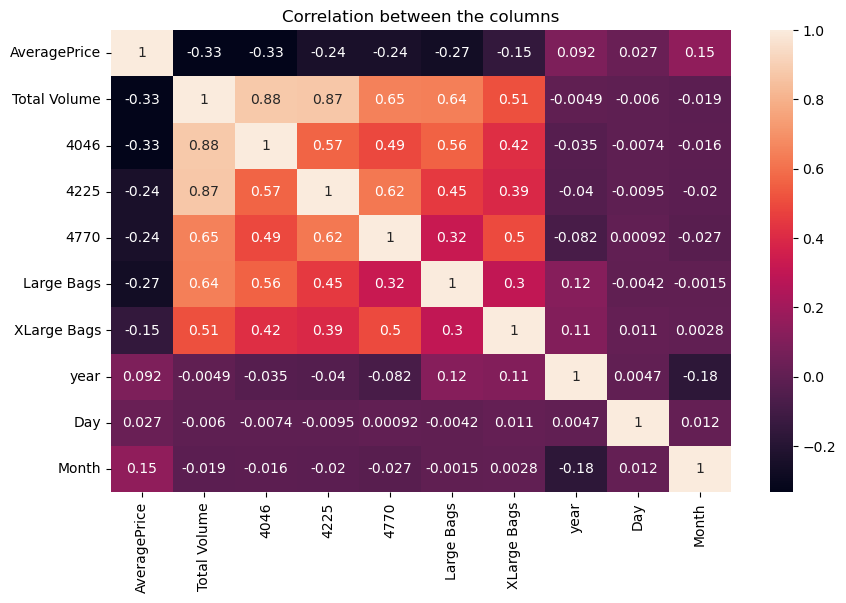

In [31]:
#Again checking correlation
avocado_cor = avocado_2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(avocado_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

In [32]:
#Checking for skewness
avocado_2.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
Day             0.011778
Month           0.107408
dtype: float64

In [35]:
#Removing skewness
avocado_2['Total Volume'] = np.cbrt(avocado_2['Total Volume'])

In [39]:
avocado_2['4046'] = np.cbrt(avocado_2['4046'])

In [43]:
avocado_2['4225'] = np.cbrt(avocado_2['4225'])

In [47]:
avocado_2['4770'] = np.cbrt(avocado_2['4770'])

In [51]:
avocado_2['Large Bags'] = np.cbrt(avocado_2['Large Bags'])

In [55]:
avocado_2['XLarge Bags'] = np.cbrt(avocado_2['XLarge Bags'])

In [56]:
avocado_2.skew()

AveragePrice    0.377432
Total Volume    0.340102
4046            0.083828
4225            0.002759
4770           -0.102949
Large Bags     -0.665466
XLarge Bags     1.036551
year            0.229976
Day             0.011778
Month           0.107408
dtype: float64

-- Removed Skewness Successfully..

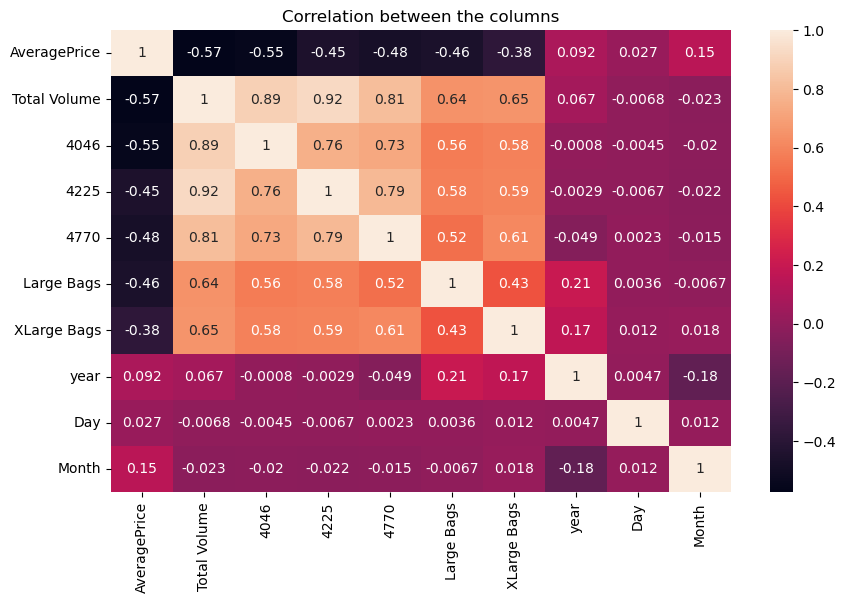

In [57]:
#Again checking correlation
avocado_cor = avocado_2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(avocado_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

In [58]:
#The column 'Total Volume' seems to still be multicollinear after removing skewness..so we will be removing that column
avocado_2.drop('Total Volume', axis=1, inplace = True)

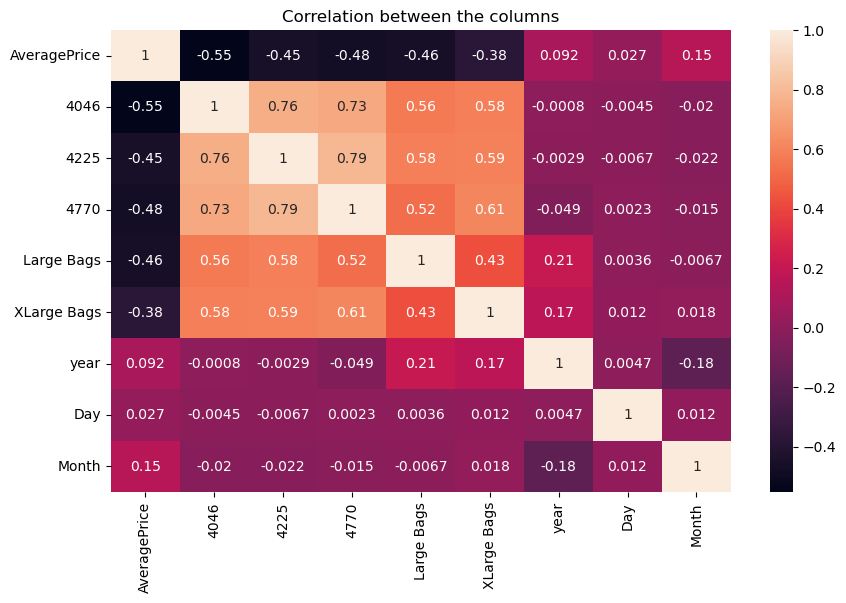

In [59]:
#Again checking correlation
avocado_cor = avocado_2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(avocado_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

In [60]:
#The columns '4225' and '4770'seems to still be multicollinear after removing skewness..so we will be removing that column
avocado_2.drop('4225', axis=1, inplace = True)
avocado_2.drop('4770', axis=1, inplace = True)

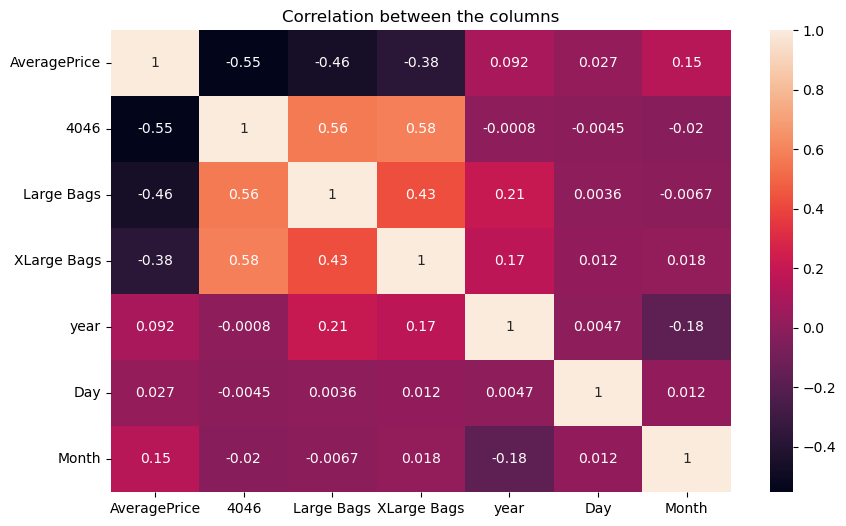

In [61]:
#Again checking correlation
avocado_cor = avocado_2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(avocado_cor, annot = True)
plt.title("Correlation between the columns")
plt.show()

## Data Preprocessing 

-- Label Encoding the Categorical Columns

In [62]:
avocado_2

AveragePrice      4046  Large Bags  XLarge Bags          type  year  \
0              1.33  2.163089    1.655198          0.0  conventional  2015   
1              1.35  2.062128    1.663396          0.0  conventional  2015   
2              0.93  2.100123    1.673841          0.0  conventional  2015   
3              1.08  2.184320    1.722894          0.0  conventional  2015   
4              1.28  2.140048    1.799324          0.0  conventional  2015   
...             ...       ...         ...          ...           ...   ...   
18244          1.63  2.332926    1.962523          0.0       organic  2018   
18245          1.71  2.196829    1.901378          0.0       organic  2018   
18246          1.87  2.196874    1.516058          0.0       organic  2018   
18247          1.93  2.258290    1.544452          0.0       organic  2018   
18248          1.62  2.424509    1.436276          0.0       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany    6     12  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    4      2  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    7      1  

[17651 rows x 9 columns]

In [63]:
#Now encoding the 'type' column
bool_columns = ['type']
for i in bool_columns:
    avocado_2[i+'_new'] = avocado_2[i].apply(lambda x : 1 if x == 'organic' else 0)
    avocado_2.drop(i,axis=1,inplace=True)

In [64]:
avocado_2

AveragePrice      4046  Large Bags  XLarge Bags  year  \
0              1.33  2.163089    1.655198          0.0  2015   
1              1.35  2.062128    1.663396          0.0  2015   
2              0.93  2.100123    1.673841          0.0  2015   
3              1.08  2.184320    1.722894          0.0  2015   
4              1.28  2.140048    1.799324          0.0  2015   
...             ...       ...         ...          ...   ...   
18244          1.63  2.332926    1.962523          0.0  2018   
18245          1.71  2.196829    1.901378          0.0  2018   
18246          1.87  2.196874    1.516058          0.0  2018   
18247          1.93  2.258290    1.544452          0.0  2018   
18248          1.62  2.424509    1.436276          0.0  2018   

                 region  Day  Month  type_new  
0                Albany   27     12         0  
1                Albany   20     12         0  
2                Albany   13     12         0  
3                Albany    6     12         0  
4                Albany   29     11         0  
...                 ...  ...    ...       ...  
18244  WestTexNewMexico    4      2         1  
18245  WestTexNewMexico   28      1         1  
18246  WestTexNewMexico   21      1         1  
18247  WestTexNewMexico   14      1         1  
18248  WestTexNewMexico    7      1         1  

[17651 rows x 9 columns]

In [65]:
#Now converting the 'region' feature
cat_col = ['region']
avocado_encoded = pd.get_dummies(avocado_2,columns=cat_col)
print (avocado_encoded)

       AveragePrice      4046  Large Bags  XLarge Bags  year  Day  Month  \
0              1.33  2.163089    1.655198          0.0  2015   27     12   
1              1.35  2.062128    1.663396          0.0  2015   20     12   
2              0.93  2.100123    1.673841          0.0  2015   13     12   
3              1.08  2.184320    1.722894          0.0  2015    6     12   
4              1.28  2.140048    1.799324          0.0  2015   29     11   
...             ...       ...         ...          ...   ...  ...    ...   
18244          1.63  2.332926    1.962523          0.0  2018    4      2   
18245          1.71  2.196829    1.901378          0.0  2018   28      1   
18246          1.87  2.196874    1.516058          0.0  2018   21      1   
18247          1.93  2.258290    1.544452          0.0  2018   14      1   
18248          1.62  2.424509    1.436276          0.0  2018    7      1   

       type_new  region_Albany  region_Atlanta  ...  region_SouthCarolina  \
0         

In [66]:
avocado_encoded

AveragePrice      4046  Large Bags  XLarge Bags  year  Day  Month  \
0              1.33  2.163089    1.655198          0.0  2015   27     12   
1              1.35  2.062128    1.663396          0.0  2015   20     12   
2              0.93  2.100123    1.673841          0.0  2015   13     12   
3              1.08  2.184320    1.722894          0.0  2015    6     12   
4              1.28  2.140048    1.799324          0.0  2015   29     11   
...             ...       ...         ...          ...   ...  ...    ...   
18244          1.63  2.332926    1.962523          0.0  2018    4      2   
18245          1.71  2.196829    1.901378          0.0  2018   28      1   
18246          1.87  2.196874    1.516058          0.0  2018   21      1   
18247          1.93  2.258290    1.544452          0.0  2018   14      1   
18248          1.62  2.424509    1.436276          0.0  2018    7      1   

       type_new  region_Albany  region_Atlanta  ...  region_SouthCarolina  \
0             0              1               0  ...                     0   
1             0              1               0  ...                     0   
2             0              1               0  ...                     0   
3             0              1               0  ...                     0   
4             0              1               0  ...                     0   
...         ...            ...             ...  ...                   ...   
18244         1              0               0  ...                     0   
18245         1              0               0  ...                     0   
18246         1              0               0  ...                     0   
18247         1              0               0  ...                     0   
18248         1              0               0  ...                     0   

       region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                        0                 0               0               0   
1                        0                 0               0               0   
2                        0                 0               0               0   
3                        0                 0               0               0   
4                        0                 0               0               0   
...                    ...               ...             ...             ...   
18244                    0                 0               0               0   
18245                    0                 0               0               0   
18246                    0                 0               0               0   
18247                    0                 0               0               0   
18248                    0                 0               0               0   

       region_Syracuse  region_Tampa  region_TotalUS  region_West  \
0                    0             0               0            0   
1                    0             0               0            0   
2                    0             0               0            0   
3                    0             0               0            0   
4                    0             0               0            0   
...                ...           ...             ...          ...   
18244                0             0               0            0   
18245                0             0               0            0   
18246                0             0               0            0   
18247                0             0               0            0   
18248                0             0               0            0   

       region_WestTexNewMexico  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
18244                        1  
18245                        1  
18246                        1  
18247                        1  
18248           

In [67]:
avocado_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 18248
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                17651 non-null  float64
 1   4046                        17651 non-null  float64
 2   Large Bags                  17651 non-null  float64
 3   XLarge Bags                 17651 non-null  float64
 4   year                        17651 non-null  int64  
 5   Day                         17651 non-null  int32  
 6   Month                       17651 non-null  int32  
 7   type_new                    17651 non-null  int64  
 8   region_Albany               17651 non-null  uint8  
 9   region_Atlanta              17651 non-null  uint8  
 10  region_BaltimoreWashington  17651 non-null  uint8  
 11  region_Boise                17651 non-null  uint8  
 12  region_Boston               17651 non-null  uint8  
 13  region_BuffaloRochester     176

-- Now, we have successfully encoded the categorical columns..Now we split the data into x and y variables...
As, the first case is regression..we shall split the 'AveragePrice' as our output variable..

In [68]:
y = avocado_encoded['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17651, dtype: float64

In [69]:
x = avocado_encoded.drop("AveragePrice",axis=1)
x

4046  Large Bags  XLarge Bags  year  Day  Month  type_new  \
0      2.163089    1.655198          0.0  2015   27     12         0   
1      2.062128    1.663396          0.0  2015   20     12         0   
2      2.100123    1.673841          0.0  2015   13     12         0   
3      2.184320    1.722894          0.0  2015    6     12         0   
4      2.140048    1.799324          0.0  2015   29     11         0   
...         ...         ...          ...   ...  ...    ...       ...   
18244  2.332926    1.962523          0.0  2018    4      2         1   
18245  2.196829    1.901378          0.0  2018   28      1         1   
18246  2.196874    1.516058          0.0  2018   21      1         1   
18247  2.258290    1.544452          0.0  2018   14      1         1   
18248  2.424509    1.436276          0.0  2018    7      1         1   

       region_Albany  region_Atlanta  region_BaltimoreWashington  ...  \
0                  1               0                           0  ...   
1                  1               0                           0  ...   
2                  1               0                           0  ...   
3                  1               0                           0  ...   
4                  1               0                           0  ...   
...              ...             ...                         ...  ...   
18244              0               0                           0  ...   
18245              0               0                           0  ...   
18246              0               0                           0  ...   
18247              0               0                           0  ...   
18248              0               0                           0  ...   

       region_SouthCarolina  region_SouthCentral  region_Southeast  \
0                         0                    0                 0   
1                         0                    0                 0   
2                         0                    0                 0   
3                         0                    0                 0   
4                         0                    0                 0   
...                     ...                  ...               ...   
18244                     0                    0                 0   
18245                     0                    0                 0   
18246                     0                    0                 0   
18247                     0                    0                 0   
18248                     0                    0                 0   

       region_Spokane  region_StLouis  region_Syracuse  region_Tampa  \
0                   0               0                0             0   
1                   0               0                0             0   
2                   0               0                0             0   
3                   0               0                0             0   
4                   0               0                0             0   
...               ...             ...              ...           ...   
18244               0               0                0             0   
18245               0               0                0             0   
18246               0               0                0             0   
18247               0               0                0             0   
18248               0               0                0             0   

       region_TotalUS  region_West  region_WestTexNewMexico  
0                   0            0                        0  
1                   0            0                        0  
2                   0            0                        0  
3                   0            0                        0  
4                   0            0                        0  
...               ...          ...                      ...  
18244               0            0                        1  
18245               0            0                        1  
18246

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(x))

In [71]:
X

0         1         2         3         4         5         6   \
0     -0.666994 -0.507022 -0.659564 -1.210013  1.289309  1.644612 -1.019047   
1     -0.767937 -0.499598 -0.659564 -1.210013  0.491652  1.644612 -1.019047   
2     -0.729948 -0.490139 -0.659564 -1.210013 -0.306004  1.644612 -1.019047   
3     -0.645767 -0.445718 -0.659564 -1.210013 -1.103660  1.644612 -1.019047   
4     -0.690031 -0.376504 -0.659564 -1.210013  1.517211  1.362113 -1.019047   
...         ...       ...       ...       ...       ...       ...       ...   
17646 -0.497188 -0.228715 -0.659564  1.980756 -1.331562 -1.180379  0.981309   
17647 -0.633260 -0.284086 -0.659564  1.980756  1.403260 -1.462878  0.981309   
17648 -0.633215 -0.633024 -0.659564  1.980756  0.605603 -1.462878  0.981309   
17649 -0.571810 -0.607311 -0.659564  1.980756 -0.192053 -1.462878  0.981309   
17650 -0.405622 -0.705273 -0.659564  1.980756 -0.989709 -1.462878  0.981309   

             7         8         9   ...        51        52        53  \
0      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
1      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
2      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
3      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
4      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
...         ...       ...       ...  ...       ...       ...       ...   
17646 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
17647 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
17648 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
17649 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
17650 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   

             54        55        56        57        58        59        60  
0     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
1     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
2     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
3     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
4     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
...         ...       ...       ...       ...       ...       ...       ...  
17646 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  
17647 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  
17648 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  
17649 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  
17650 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  

[17651 rows x 61 columns]

In [72]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

In [73]:
print("X_train ",X1_train.shape)
print("y_train ",y1_train.shape)
print("X_test ",X1_test.shape)
print("y_test ",y1_test.shape)

X_train  (14120, 61)
y_train  (14120,)
X_test  (3531, 61)
y_test  (3531,)


## Model Training 

--As this is a Regression problem, we shall predict values using all the models which fall under regression... such as Linear Regression,Decision Tree Regressor,Random Forest Regressor,Lasso and Ridge..

#### Linear Regression 

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [75]:
LR = LinearRegression()
LR.fit(X1_train,y1_train)
LR_pred = LR.predict(X1_test)
LR_pred_train = LR.predict(X1_train)
pred_train = LR.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,LR_pred))
print('R2_score on training data:',r2_score(y1_train,LR_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,LR_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,LR_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,LR_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,LR_pred)))

R2_score on testing data: 0.6064980639449563
R2_score on training data: 0.605459325566682
Mean Absolute Error: 0.1853190137045208
Mean Squared Error on training data: 0.0588189330642081
Mean Squared Error on testing data: 0.05812637921580351
Root Mean Squared Error: 0.2410941293681858


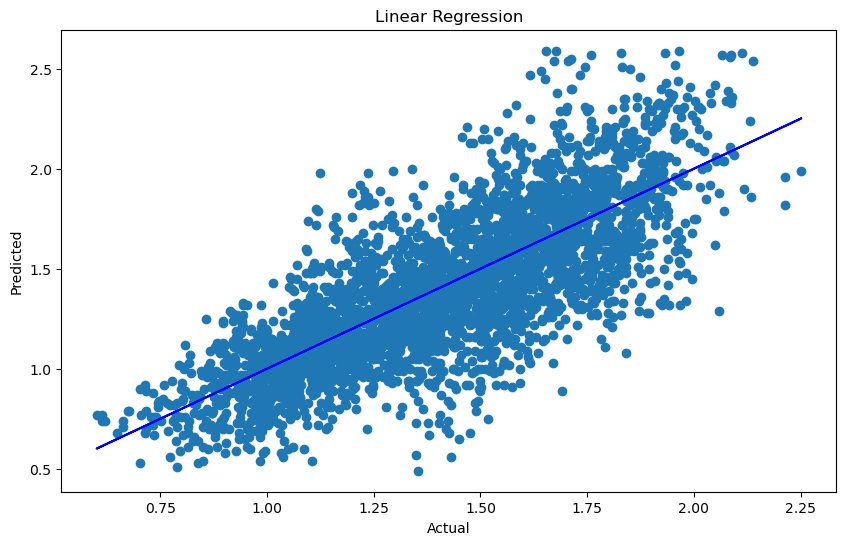

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(x=LR_pred,y=y1_test)
plt.plot(LR_pred,LR_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

-- Conclusion:

MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in this above case of Linear Regression model we see that there are two instances..i.e MSE on training and testing data..0.057 and 0.059, which does not have much a difference(which is better in this case)..

r2 score - (coefficient of determination- ranges from 0 to 1)..in this case..R squared value on testing data is 0.6002 which explains 60.02% of variation in target variable, which is an average score...

#### Decision Tree Regressor 

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
dtr = DecisionTreeRegressor()
dtr.fit(X1_train,y1_train)
dtr_pred = dtr.predict(X1_test)
dtr_pred_train = dtr.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,dtr_pred))
print('R2_score on training data:',r2_score(y1_train,dtr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,dtr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,dtr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,dtr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,dtr_pred)))

R2_score on testing data: 0.7642601360098744
R2_score on training data: 1.0
Mean Absolute Error: 0.1253780798640612
Mean Squared Error on training data: 1.230849278905837e-34
Mean Squared Error on testing data: 0.03482245822713113
Root Mean Squared Error: 0.18660776572032345


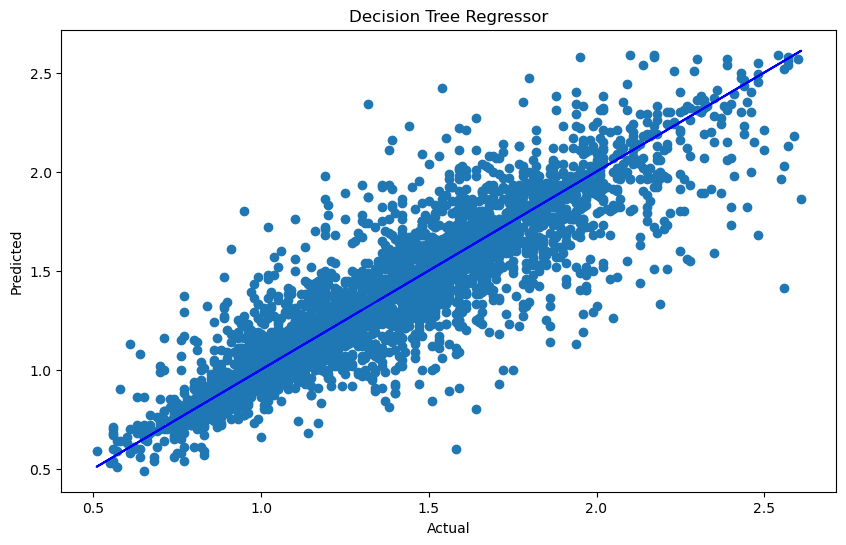

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(x=dtr_pred,y=y1_test)
plt.plot(dtr_pred,dtr_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor')
plt.show()

-- Conclusion:

MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in this above case of Linear Regression model we see that there are two instances..i.e MSE on training and testing data..the difference between these two are very high, so not a good predictive model for our dataset..

r2 score - (coefficient of determination- ranges from 0 to 1)..in this case..R squared value on testing data is 0.7642 which explains 76.42% of variation in target variable, which is a very bad rate as compared to the R squared value on training data..

#### Random Forest Regressor 

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
rfr = RandomForestRegressor()
rfr.fit(X1_train,y1_train)
rfr_pred = rfr.predict(X1_test)
rfr_pred_train = rfr.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,rfr_pred))
print('R2_score on training data:',r2_score(y1_train,rfr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,rfr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,rfr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,rfr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,rfr_pred)))

R2_score on testing data: 0.8819403587286347
R2_score on training data: 0.9835920231554027
Mean Absolute Error: 0.09460569243840271
Mean Squared Error on training data: 0.002446134845609065
Mean Squared Error on testing data: 0.017439252135372417
Root Mean Squared Error: 0.13205776060259547


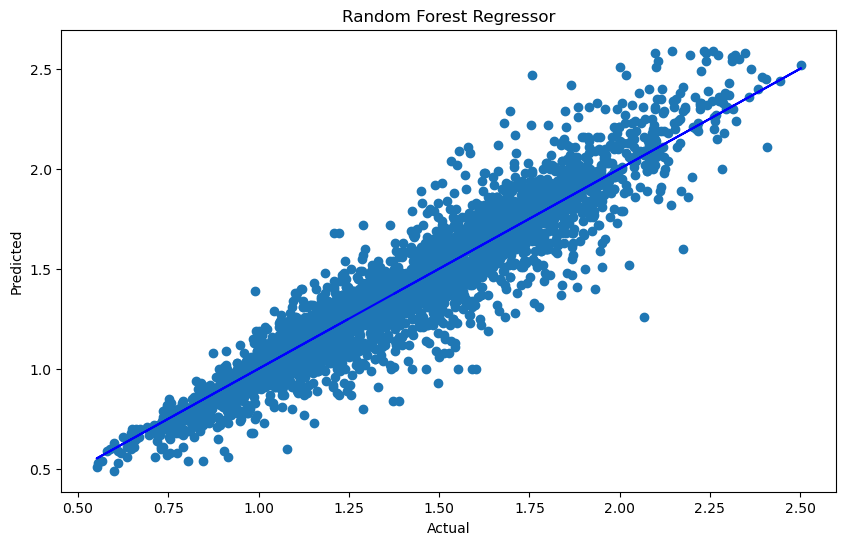

In [82]:
plt.figure(figsize=(10,6))
plt.scatter(x=rfr_pred,y=y1_test)
plt.plot(rfr_pred,rfr_pred,color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor')
plt.show()

-- Conclusion:

MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in this above case of Linear Regression model we see that there are two instances..i.e MSE on training and testing data..0.002 and 0.017, the difference is pretty good..

r2 score - (coefficient of determination- ranges from 0 to 1)..in this case..R squared value on testing data is 0.8819 which explains 88.19% of variation in target variable, which is a very very good rate compared to other models..

#### Support Vector Regressor 

In [83]:
from sklearn.svm import SVR

In [84]:
svr = SVR()
svr.fit(X1_train,y1_train)
svr_pred = svr.predict(X1_test)
svr_pred_train = svr.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,svr_pred))
print('R2_score on training data:',r2_score(y1_train,svr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,svr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,svr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,svr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,svr_pred)))

R2_score on testing data: 0.7485397823022192
R2_score on training data: 0.7751147925169822
Mean Absolute Error: 0.14260619489924356
Mean Squared Error on training data: 0.03352634803768446
Mean Squared Error on testing data: 0.0371445998922484
Root Mean Squared Error: 0.19272934362013586


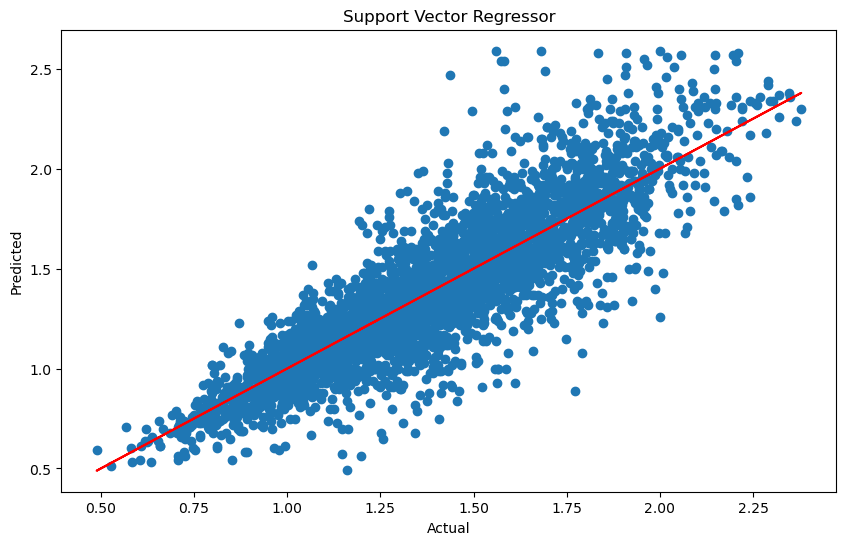

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(x=svr_pred,y=y1_test)
plt.plot(svr_pred,svr_pred,color = 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Support Vector Regressor')
plt.show()

-- Conclusion:

MAE,MSE and RMSE - These three methods measures the errors by calculating the difference between the predicted values and the actual value..so the lesser the better..and in this above case of Linear Regression model we see that there are two instances..i.e MSE on training and testing data..0.033 and 0.037, the difference is pretty good..but the MAE is high compared to the previous model (i.e random forest regressor)

r2 score - (coefficient of determination- ranges from 0 to 1)..in this case..R squared value on testing data is 0.7485 which explains 74.85% of variation in target variable, which is a good rate but not the best out of all the models..

#### K-neighbours Regressor

In [91]:
from sklearn.neighbors import KNeighborsRegressor

In [92]:
knr = KNeighborsRegressor()
knr.fit(X1_train,y1_train)
knr_pred = knr.predict(X1_test)
knr_pred_train = knr.predict(X1_train)
print('R2_score on testing data:',r2_score(y1_test,knr_pred))
print('R2_score on training data:',r2_score(y1_train,knr_pred_train))
print('Mean Absolute Error:',mean_absolute_error(y1_test,knr_pred))
print('Mean Squared Error on training data:',mean_squared_error(y1_train,knr_pred_train))
print('Mean Squared Error on testing data:',mean_squared_error(y1_test,knr_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y1_test,knr_pred)))

R2_score on testing data: 0.7682882900643087
R2_score on training data: 0.8555385021645497
Mean Absolute Error: 0.1331588785046729
Mean Squared Error on training data: 0.021536616430594898
Mean Squared Error on testing data: 0.03422743698668932
Root Mean Squared Error: 0.18500658633326902


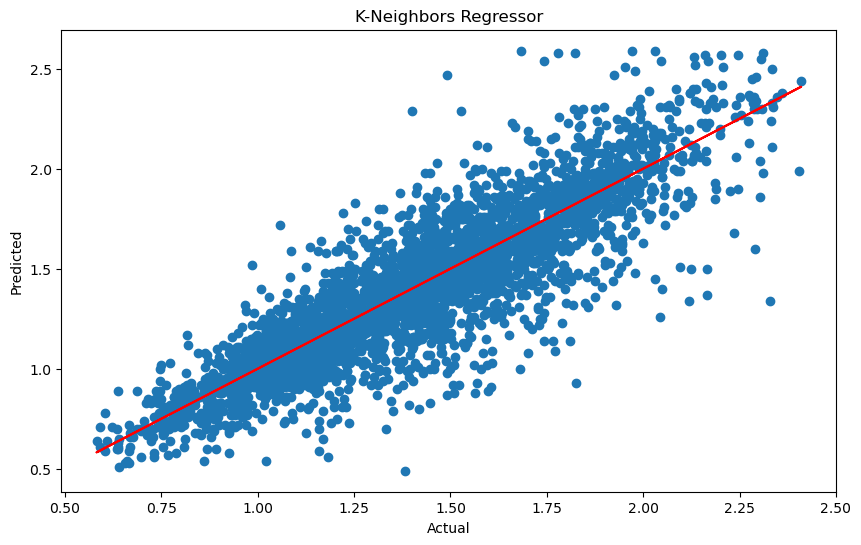

In [93]:
plt.figure(figsize=(10,6))
plt.scatter(x=knr_pred,y=y1_test)
plt.plot(knr_pred,knr_pred,color = 'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-Neighbors Regressor')
plt.show()

#### Cross-Validation Score 

In [95]:
#Checking Cross-validation scores for the top three models i.e(Linear,RandomForest and Support Vector regression models)
#Linear regression
from sklearn.model_selection import cross_val_score
score = cross_val_score(LR,x,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between mean squared error and cross validation score is - ",(r2_score(y1_test,LR_pred) - score.mean())*100)

[0.05963072 0.31320911 0.53742429 0.27856725 0.21638626]
0.28104352525339255
Difference between mean squared error and cross validation score is -  32.545453869156376


In [96]:
#Random Forest Regressor
score = cross_val_score(rfr,x,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between mean squared error and cross validation score is - ",(r2_score(y1_test,rfr_pred) - score.mean())*100)

[-0.03608072  0.52436295  0.62252174  0.24266014  0.00575944]
0.27184470837530916
Difference between mean squared error and cross validation score is -  61.00956503533256


In [98]:
#Support Vector Regressor
score = cross_val_score(svr,x,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between mean squared error and cross validation score is - ",(r2_score(y1_test,svr_pred) - score.mean())*100)

[-3.66537542 -0.47054367 -0.07189147 -0.59248388 -0.94052734]
-1.1481643568020246
Difference between mean squared error and cross validation score is -  189.67041391042437


In [99]:
#K-Neighbor Regressor
score = cross_val_score(knr,x,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between mean squared error and cross validation score is - ",(r2_score(y1_test,knr_pred) - score.mean())*100)

[-2.19672039  0.41995342  0.50229737  0.037041   -0.06381442]
-0.2602486058948878
Difference between mean squared error and cross validation score is -  102.85368959591965


Conclusion:

-- From the cross-validation scores and the values of the metrics as seen in the above cells of different regression models, I will be choosing Random Forest Regressor as my final model for the prediction of Avocado's prices.

(Why?) -- From the above values observed from the r2 scores,MSE and MAE..Random Forest Regressor stands out as the best model for the prediction, because of it's high r2 score on both training and testing data and also the cross validation scores which tells us the performance of the model is much better than other regression models, and also because the given dataset is very large, Random Forest can handle large datasets with a huge number of features..

Therefore, Random Forest Regressor is our final model.. 

### Hyper Parameter Tuning 

In [111]:
Final_model = RandomForestRegressor(max_depth = 60, min_samples_split = 2, n_estimators = 900)
Final_model.fit(X1_train,y1_train)
fm_pred = Final_model.predict(X1_test)
print('R2_score on testing data:',r2_score(y1_test,fm_pred))
#fm_acc = accuracy_score(fm_pred,y1_test)
#print('Test accuracy is: {:.2f}%'.format(fm_acc*100))

R2_score on testing data: 0.8840728591916716


-- Slight increase in the r2 score of the testing data of the Final model

### Saving the Model 

In [112]:
import joblib
joblib.dump(Final_model,"Avocado_Project_Regression.pkl")

['Avocado_Project_Regression.pkl']

In [113]:
model = joblib.load("Avocado_Project_Regression.pkl")
prediction = model.predict(X1_test)
prediction

array([1.37301111, 1.6145    , 1.16867778, ..., 2.31547778, 1.53994444,
       1.22802222])

In [115]:
b = np.array(y1_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

Predicted  Original
0      1.373011      1.36
1      1.614500      1.70
2      1.168678      1.22
3      0.849178      0.81
4      1.862267      1.85
...         ...       ...
3526   1.777100      1.79
3527   1.255767      1.19
3528   2.315478      2.31
3529   1.539944      1.55
3530   1.228022      1.35

[3531 rows x 2 columns]

### b) Classification  

In [119]:
avocado_1

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Day  Month  
0                Albany   27     12  
1                Albany   20     12  
2                Albany   13     12  
3                Albany    6     12  
4                Albany   29     11  
...                 ...  ...    ...  
18244  WestTexNewMexico    4      2  
18245  WestTexNewMexico   28      1  
18246  WestTexNewMexico   21      1  
18247  WestTexNewMexico   14      1  
18248  WestTexNewMexico    7      1  

[18249 rows x 14 columns]

-- Now, as we said earlier this question can bo analysed in two angles (one of classification and other of regression)..
We move onto the classification part with the output variable (feature 'type') i.e we are going to be predicting the type of avocado (whether conventional or organic)

conventional - 0 and organic - 1

In [120]:
#Getting our encoded data
avocado_encoded

AveragePrice      4046  Large Bags  XLarge Bags  year  Day  Month  \
0              1.33  2.163089    1.655198          0.0  2015   27     12   
1              1.35  2.062128    1.663396          0.0  2015   20     12   
2              0.93  2.100123    1.673841          0.0  2015   13     12   
3              1.08  2.184320    1.722894          0.0  2015    6     12   
4              1.28  2.140048    1.799324          0.0  2015   29     11   
...             ...       ...         ...          ...   ...  ...    ...   
18244          1.63  2.332926    1.962523          0.0  2018    4      2   
18245          1.71  2.196829    1.901378          0.0  2018   28      1   
18246          1.87  2.196874    1.516058          0.0  2018   21      1   
18247          1.93  2.258290    1.544452          0.0  2018   14      1   
18248          1.62  2.424509    1.436276          0.0  2018    7      1   

       type_new  region_Albany  region_Atlanta  ...  region_SouthCarolina  \
0             0              1               0  ...                     0   
1             0              1               0  ...                     0   
2             0              1               0  ...                     0   
3             0              1               0  ...                     0   
4             0              1               0  ...                     0   
...         ...            ...             ...  ...                   ...   
18244         1              0               0  ...                     0   
18245         1              0               0  ...                     0   
18246         1              0               0  ...                     0   
18247         1              0               0  ...                     0   
18248         1              0               0  ...                     0   

       region_SouthCentral  region_Southeast  region_Spokane  region_StLouis  \
0                        0                 0               0               0   
1                        0                 0               0               0   
2                        0                 0               0               0   
3                        0                 0               0               0   
4                        0                 0               0               0   
...                    ...               ...             ...             ...   
18244                    0                 0               0               0   
18245                    0                 0               0               0   
18246                    0                 0               0               0   
18247                    0                 0               0               0   
18248                    0                 0               0               0   

       region_Syracuse  region_Tampa  region_TotalUS  region_West  \
0                    0             0               0            0   
1                    0             0               0            0   
2                    0             0               0            0   
3                    0             0               0            0   
4                    0             0               0            0   
...                ...           ...             ...          ...   
18244                0             0               0            0   
18245                0             0               0            0   
18246                0             0               0            0   
18247                0             0               0            0   
18248                0             0               0            0   

       region_WestTexNewMexico  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  
...                        ...  
18244                        1  
18245                        1  
18246                        1  
18247                        1  
18248           

In [121]:
#Splitting our data into x and y variables
## Here we have the target variable - y1
y1 = avocado_encoded['type_new']
y1

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type_new, Length: 17651, dtype: int64

In [122]:
y1.value_counts()

1    8992
0    8659
Name: type_new, dtype: int64

-- Data is balanced, therefore no need of any oversampling.

In [123]:
x1 = avocado_encoded.drop("type_new",axis=1)
x1

AveragePrice      4046  Large Bags  XLarge Bags  year  Day  Month  \
0              1.33  2.163089    1.655198          0.0  2015   27     12   
1              1.35  2.062128    1.663396          0.0  2015   20     12   
2              0.93  2.100123    1.673841          0.0  2015   13     12   
3              1.08  2.184320    1.722894          0.0  2015    6     12   
4              1.28  2.140048    1.799324          0.0  2015   29     11   
...             ...       ...         ...          ...   ...  ...    ...   
18244          1.63  2.332926    1.962523          0.0  2018    4      2   
18245          1.71  2.196829    1.901378          0.0  2018   28      1   
18246          1.87  2.196874    1.516058          0.0  2018   21      1   
18247          1.93  2.258290    1.544452          0.0  2018   14      1   
18248          1.62  2.424509    1.436276          0.0  2018    7      1   

       region_Albany  region_Atlanta  region_BaltimoreWashington  ...  \
0                  1               0                           0  ...   
1                  1               0                           0  ...   
2                  1               0                           0  ...   
3                  1               0                           0  ...   
4                  1               0                           0  ...   
...              ...             ...                         ...  ...   
18244              0               0                           0  ...   
18245              0               0                           0  ...   
18246              0               0                           0  ...   
18247              0               0                           0  ...   
18248              0               0                           0  ...   

       region_SouthCarolina  region_SouthCentral  region_Southeast  \
0                         0                    0                 0   
1                         0                    0                 0   
2                         0                    0                 0   
3                         0                    0                 0   
4                         0                    0                 0   
...                     ...                  ...               ...   
18244                     0                    0                 0   
18245                     0                    0                 0   
18246                     0                    0                 0   
18247                     0                    0                 0   
18248                     0                    0                 0   

       region_Spokane  region_StLouis  region_Syracuse  region_Tampa  \
0                   0               0                0             0   
1                   0               0                0             0   
2                   0               0                0             0   
3                   0               0                0             0   
4                   0               0                0             0   
...               ...             ...              ...           ...   
18244               0               0                0             0   
18245               0               0                0             0   
18246               0               0                0             0   
18247               0               0                0             0   
18248               0               0                0             0   

       region_TotalUS  region_West  region_WestTexNewMexico  
0                   0            0                        0  
1                   0            0                        0  
2                   0            0                        0  
3                   0            0                        0  
4                   0            0                        0  
...               ...          ...                      ...  
18244               0            0                        1  
18245          

In [124]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = pd.DataFrame(sc.fit_transform(x1))

In [125]:
X1

0         1         2         3         4         5         6   \
0     -0.195352 -0.666994 -0.507022 -0.659564 -1.210013  1.289309  1.644612   
1     -0.143510 -0.767937 -0.499598 -0.659564 -1.210013  0.491652  1.644612   
2     -1.232207 -0.729948 -0.490139 -0.659564 -1.210013 -0.306004  1.644612   
3     -0.843387 -0.645767 -0.445718 -0.659564 -1.210013 -1.103660  1.644612   
4     -0.324959 -0.690031 -0.376504 -0.659564 -1.210013  1.517211  1.362113   
...         ...       ...       ...       ...       ...       ...       ...   
17646  0.582289 -0.497188 -0.228715 -0.659564  1.980756 -1.331562 -1.180379   
17647  0.789660 -0.633260 -0.284086 -0.659564  1.980756  1.403260 -1.462878   
17648  1.204402 -0.633215 -0.633024 -0.659564  1.980756  0.605603 -1.462878   
17649  1.359930 -0.571810 -0.607311 -0.659564  1.980756 -0.192053 -1.462878   
17650  0.556367 -0.405622 -0.705273 -0.659564  1.980756 -0.989709 -1.462878   

             7         8         9   ...        51        52        53  \
0      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
1      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
2      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
3      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
4      7.156947 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
...         ...       ...       ...  ...       ...       ...       ...   
17646 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
17647 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
17648 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
17649 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   
17650 -0.139724 -0.139514 -0.139724  ... -0.139724 -0.129697 -0.133044   

             54        55        56        57        58        59        60  
0     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
1     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
2     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
3     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
4     -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313 -0.138455  
...         ...       ...       ...       ...       ...       ...       ...  
17646 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  
17647 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  
17648 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  
17649 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  
17650 -0.137602 -0.138667 -0.139724 -0.139302 -0.098321 -0.121313  7.222580  

[17651 rows x 61 columns]

In [126]:
# Now, Splitting the data into training and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size = 0.20)

In [127]:
print("X_train ",X_train.shape)
print("y_train ",y_train.shape)
print("X_test ",X_test.shape)
print("y_test ",y_test.shape)

X_train  (14120, 61)
y_train  (14120,)
X_test  (3531, 61)
y_test  (3531,)


### Model Training 

#### Logistic Regression 

In [128]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [129]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test,logreg_pred)
print('Test accuracy is: {:.2f}%'.format(logreg_acc*100))

Test accuracy is: 99.89%


In [130]:
print(classification_report(y_test,logreg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1713
           1       1.00      1.00      1.00      1818

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



In [131]:
a = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[1710    3]
 [   1 1817]]
TN:  1710
FN:  1
TP:  1817
FP:  3


#### Decision Tree Classifier 

In [132]:
from sklearn.tree import DecisionTreeClassifier

In [133]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(dtree_acc*100))

Test accuracy is: 99.46%


In [134]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1713
           1       0.99      1.00      0.99      1818

    accuracy                           0.99      3531
   macro avg       0.99      0.99      0.99      3531
weighted avg       0.99      0.99      0.99      3531



In [135]:
a = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[1701   12]
 [   7 1811]]
TN:  1701
FN:  7
TP:  1811
FP:  12


#### Random Forest Classifier 

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
r_f = RandomForestClassifier()
r_f.fit(X_train,y_train)
r_f_pred = r_f.predict(X_test)
r_f_acc = accuracy_score(r_f_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(r_f_acc*100))

Test accuracy is: 99.75%


In [138]:
print(classification_report(y_test,r_f_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1713
           1       1.00      1.00      1.00      1818

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



In [139]:
a = confusion_matrix(y_test, r_f_pred, labels=r_f.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[1707    6]
 [   3 1815]]
TN:  1707
FN:  3
TP:  1815
FP:  6


#### Naive Bayes Classifier 

In [140]:
from sklearn.naive_bayes import GaussianNB

In [141]:
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(nb_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(nb_acc*100))

Test accuracy is: 58.96%


In [142]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.54      1.00      0.70      1713
           1       1.00      0.20      0.34      1818

    accuracy                           0.59      3531
   macro avg       0.77      0.60      0.52      3531
weighted avg       0.78      0.59      0.51      3531



In [143]:
a = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[1712    1]
 [1448  370]]
TN:  1712
FN:  1448
TP:  370
FP:  1


#### Support Vector Classifier 

In [144]:
from sklearn.svm import SVC

In [145]:
svc = SVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(svc_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(svc_acc*100))

Test accuracy is: 99.89%


In [146]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1713
           1       1.00      1.00      1.00      1818

    accuracy                           1.00      3531
   macro avg       1.00      1.00      1.00      3531
weighted avg       1.00      1.00      1.00      3531



In [147]:
a = confusion_matrix(y_test, svc_pred, labels=svc.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[1711    2]
 [   2 1816]]
TN:  1711
FN:  2
TP:  1816
FP:  2


#### K-Neighbor Classifier 

In [148]:
from sklearn.neighbors import KNeighborsClassifier

In [149]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(knn_pred,y_test)
print('Test accuracy is: {:.2f}%'.format(knn_acc*100))

Test accuracy is: 99.32%


In [150]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1713
           1       0.99      0.99      0.99      1818

    accuracy                           0.99      3531
   macro avg       0.99      0.99      0.99      3531
weighted avg       0.99      0.99      0.99      3531



In [151]:
a = confusion_matrix(y_test, knn_pred, labels=knn.classes_)
print(a)
print("TN: ",a[0][0])
print("FN: ",a[1][0])
print("TP: ",a[1][1])
print("FP: ",a[0][1])

[[1700   13]
 [  11 1807]]
TN:  1700
FN:  11
TP:  1807
FP:  13


-- Conclusion

From the above segment of Model Training (Classification) of various models such as Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Naive Bayes Classifier, Support Vector Classifier and K-Neighbor Classifier, the two models that stand out the most is the Logistic Regression Model and the Support Vector Classifier Model..

The Classification metrics used to evaluate the performance of the model are accuracy score, confusion matrix (looking for high ratio of TP and TN) and also the classification report (mainly observing for the precision in this case).
In the case of both Logistic and Support Vector Classifier models, the accuracy score is  99.89%, and from the confusion matrix we see that the ratio of TP and TN is at a good rate (where TP>TN ) with the classifiaction report saying precision is also perfect with a value of 1.

As the performance of both these models is really good,It is only one we are going to choose. I am going to choose Logistic Regression as my best and Final model as Logistic Regression works really well with binary classification and Therefore I will be choosing Logistic regression as my Final Model.

In [152]:
#Cross Validation Score
from sklearn.model_selection import cross_val_score

In [153]:
#Logistic Regression
score = cross_val_score(logreg,x1,y1,scoring = 'accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,logreg_pred) - score.mean())

[0.95242141 0.9427762  0.95042493 0.92577904 0.93796034]
0.94187238405607
Difference between Accuracy score and cross validation score is -  0.056994792381199866


In [154]:
score = cross_val_score(svc,x1,y1,scoring = 'accuracy')
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,svc_pred) - score.mean())

[0.5094874  0.50934844 0.50934844 0.50934844 0.50963173]
0.5094328902324454
Difference between Accuracy score and cross validation score is -  0.48943428620482443


-- From the cross-val scores we got above, we can clearly see that Logistic Regression has the least difference between the accuracy scores and mean score(cross val score).Therefore, Logistic Regression is our Final model..

### Plotting AUC-ROC curve for Final Model 

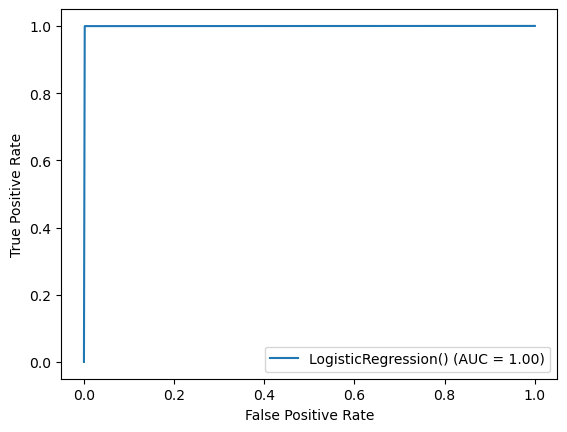

In [155]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,logreg_pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=logreg)
display.plot()

## Saving the model (Classification) 

In [156]:
import joblib
joblib.dump(logreg,"Avocado_project_classification.pkl")

['Avocado_project_classification.pkl']

In [157]:
model = joblib.load("Avocado_project_classification.pkl")
prediction = model.predict(X_test)
prediction

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [158]:
b = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = b
df

Predicted  Original
0             0         0
1             1         1
2             1         1
3             0         0
4             1         1
...         ...       ...
3526          0         0
3527          1         1
3528          0         0
3529          0         0
3530          1         1

[3531 rows x 2 columns]